# Variant-effect prediction comparison

## Setup

In [1]:
if (! exists("snakemake")) {
    library(methods)
    Snakemake <- setClass(
        "Snakemake",
        slots = c(
            input = "list",
            output = "list",
            params = "list",
            wildcards = "list",
            threads = "numeric",
            log = "list",
            resources = "list",
            config = "list",
            rule = "character",
            bench_iteration = "numeric",
            scriptdir = "character",
            source = "function"
        )
    )
    snakemake <- Snakemake(
        input = list('output/smk/evaluation/prc.parquet/run=enformer_veff1/data.parquet', 'output/smk/evaluation/prc.parquet/run=enformer_veff2/data.parquet', 'output/smk/evaluation/prc.parquet/run=enformer_veff3/data.parquet', 'output/smk/evaluation/prc_tissue.parquet/run=enformer_veff1/data.parquet', 'output/smk/evaluation/prc_tissue.parquet/run=enformer_veff2/data.parquet', 'output/smk/evaluation/prc_tissue.parquet/run=enformer_veff3/data.parquet', 'output/smk/evaluation/prc_tissue_type.parquet/run=enformer_veff1/data.parquet', 'output/smk/evaluation/prc_tissue_type.parquet/run=enformer_veff2/data.parquet', 'output/smk/evaluation/prc_tissue_type.parquet/run=enformer_veff3/data.parquet', 'output/smk/evaluation/prc_fold.parquet/run=enformer_veff1/data.parquet', 'output/smk/evaluation/prc_fold.parquet/run=enformer_veff2/data.parquet', 'output/smk/evaluation/prc_fold.parquet/run=enformer_veff3/data.parquet', 'output/smk/evaluation/r2.parquet/run=enformer_veff1/data.parquet', 'output/smk/evaluation/r2.parquet/run=enformer_veff2/data.parquet', 'output/smk/evaluation/r2.parquet/run=enformer_veff3/data.parquet', 'output/smk/evaluation/r2_tissue.parquet/run=enformer_veff1/data.parquet', 'output/smk/evaluation/r2_tissue.parquet/run=enformer_veff2/data.parquet', 'output/smk/evaluation/r2_tissue.parquet/run=enformer_veff3/data.parquet', 'output/smk/evaluation/r2_tissue_type.parquet/run=enformer_veff1/data.parquet', 'output/smk/evaluation/r2_tissue_type.parquet/run=enformer_veff2/data.parquet', 'output/smk/evaluation/r2_tissue_type.parquet/run=enformer_veff3/data.parquet', 'output/smk/evaluation/r2_fold.parquet/run=enformer_veff1/data.parquet', 'output/smk/evaluation/r2_fold.parquet/run=enformer_veff2/data.parquet', 'output/smk/evaluation/r2_fold.parquet/run=enformer_veff3/data.parquet'),
        output = list(),
        params = list(),
        wildcards = list('dev1', "comparison_id" = 'dev1'),
        threads = 1,
        log = list('output/smk/comparison/notebooks/dev1.r.ipynb', "notebook" = 'output/smk/comparison/notebooks/dev1.r.ipynb'),
        resources = list('tmpdir', 'mem_mb', 'mem_mib', "tmpdir" = '/tmp', "mem_mb" = 121000, "mem_mib" = 115395),
        config = list("output_path" = 'output/smk', "debug" = TRUE, "test" = list("dataloader_size" = 100, "is_random_enformer" = TRUE, "precomputed_enformer_mapper_path" = 'example_files/gtex_enformer_lm_models_pseudocount1.pkl'), "benchmark" = list("genotypes_path" = 'example_files/gtex_samples/rare_variants.vcf.parquet', "annotation_path" = 'example_files/gtex_samples/benchmark_with_annotation.parquet', "folds_path" = 'example_files/gtex_samples/folds.parquet', "fdr_cutoff" = 0.2), "runs" = list("enformer_veff1" = list("predictor" = 'enformer', "alternative" = 'alt1', "mapper" = 'elasticnet_cage', "isoform_file" = 'example_files/isoform_proportions.tsv', "aggregation_mode" = 'logsumexp', "upstream_tss" = 2000, "downstream_tss" = 500), "enformer_veff2" = list("predictor" = 'enformer', "alternative" = 'alt1', "mapper" = 'elasticnet_cage', "isoform_file" = NULL, "aggregation_mode" = 'canonical', "upstream_tss" = 2000, "downstream_tss" = 500), "enformer_veff3" = list("predictor" = 'enformer', "alternative" = 'alt1', "mapper" = 'lightgbm_cage', "isoform_file" = 'example_files/isoform_proportions.tsv', "aggregation_mode" = 'logsumexp', "upstream_tss" = 2000, "downstream_tss" = 500), "enformer_veff4" = list("predictor" = 'enformer', "alternative" = 'alt1', "mapper" = 'lightgbm_cage', "isoform_file" = NULL, "aggregation_mode" = 'canonical', "upstream_tss" = 2000, "downstream_tss" = 500), "enformer_veff5" = list("predictor" = 'enformer', "alternative" = 'alt1', "mapper" = 'lightgbm_cage', "isoform_file" = 'example_files/isoform_proportions.tsv', "aggregation_mode" = 'logsumexp', "upstream_tss" = 100, "downstream_tss" = 500), "enformer_veff6" = list("predictor" = 'enformer', "alternative" = 'alt1', "mapper" = 'lightgbm_cage', "isoform_file" = NULL, "aggregation_mode" = 'canonical', "upstream_tss" = 100, "downstream_tss" = 500), "enformer_veff7" = list("predictor" = 'enformer', "alternative" = 'alt1', "mapper" = 'lightgbm_cage', "isoform_file" = NULL, "aggregation_mode" = 'canonical', "upstream_tss" = NULL, "downstream_tss" = NULL)), "comparisons" = list("dev1" = c('enformer_veff1', 'enformer_veff2', 'enformer_veff3')), "genomes" = list("chr21_22" = list("gtf_file" = 'example_files/annot.gtf.gz', "fasta_file" = 'example_files/seq.fa', "canonical_only" = FALSE, "protein_coding_only" = TRUE, "chromosomes" = c('chr21', 'chr22'))), "vcfs" = list("chr21_22_var" = list("path" = 'example_files/vcf', "variant_upstream_tss" = 2000, "variant_downstream_tss" = 500)), "enformer" = list("models" = list("short" = list("shift" = 43, "batch_size" = 2, "num_output_bins" = 21), "complete" = list("shift" = 43, "batch_size" = 2, "num_output_bins" = 896)), "references" = list("ref1" = list("genome" = 'chr21_22', "model" = 'short')), "alternatives" = list("alt1" = list("reference" = 'ref1', "vcf" = 'chr21_22_var')), "mappers" = list("elasticnet_cage" = list("num_agg_bins" = 3, "expression_path" = 'example_files/gtex_samples/transcripts_tpms.zarr', "tracks_path" = 'assets/enformer_tracks/cage_nonuniversal_enformer_tracks.yaml', "type" = 'ElasticNet', "params" = list("cv" = 2, "max_iter" = 1000)), "lightgbm_cage" = list("num_agg_bins" = 3, "expression_path" = 'example_files/gtex_samples/transcripts_tpms.zarr', "tracks_path" = 'assets/enformer_tracks/cage_nonuniversal_enformer_tracks.yaml', "type" = 'LightGBM')))),
        rule = 'comparison',
        bench_iteration = as.numeric(NA),
        scriptdir = '/home/george/Projects/kipoi_enformer/workflow/notebooks',
        source = function(...){
            wd <- getwd()
            setwd(snakemake@scriptdir)
            source(...)
            setwd(wd)
        }
    )
    setwd('/home/george/Projects/kipoi_enformer');
}

In [2]:
library('data.table')
library('arrow')
library('dplyr')
library('rstatix')
library('ggplot2')
library('cowplot')
library('repr')
library('ggpubr')

Warning message:
“package ‘data.table’ was built under R version 4.3.3”
Warning message:
“package ‘arrow’ was built under R version 4.3.3”

Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp


Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘cowplot’ was built under R version 4.3.2”
Warning message:
“package ‘repr’ was built under R version 4.3.3”

Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


In [3]:
# set global plot parameters
LINESIZE = 1
FONTSIZE = 12
THEME = theme_cowplot(font_size = FONTSIZE, font_family = 'Helvetica') + theme(plot.tag = element_text(face = "bold"))
options(repr.plot.width=12, repr.plot.height=8, repr.plot.res=200)

In [4]:
# define paths
OUTPUT_PATH = snakemake@config$output_path
EVAL_PATH = file.path(OUTPUT_PATH, 'evaluation')

# comparison config
COMPARISON_ID = snakemake@wildcards$comparison_id
RUN_KEYS = as.factor(snakemake@config$comparisons[[COMPARISON_ID]])
TYPES = c('total', 'obvious', 'not_obvious')

In [5]:
eval_list = list()
for (metric in c('prc', 'r2')){
    for (feature in c('', '_tissue', '_tissue_type', '_fold')){
        fname = paste0(metric, feature, '.parquet')
        df = (file.path(EVAL_PATH, fname) %>%
              open_dataset(partitioning = c('run')) %>%
              as.data.table() %>%
              .[run %in% RUN_KEYS])
        df = df[, run := factor(run, levels=RUN_KEYS)]
        df = df[, type_ := factor(type_, levels=TYPES)]
        eval_list[[fname]] = df
    }
}

## Analysis

In [6]:
superscript_mapping = c(
    `-` = '⁻',
    `+` = "", # ⁺
    `0` = "\u2070",
    `1` = "\u00B9",
    `2` = "\u00B2",
    `3` = "\u00B3",
    `4` = "\u2074",
    `5` = "\u2075",
    `6` = "\u2076",
    `7` = "\u2077",
    `8` = "\u2078",
    `9` = "\u2079"
)


In [7]:
fancy_scientific <- function(l, digits=NULL, low=1/1000, high=1000) {
    # turn in to character string in scientific notation
    l = as.numeric(l)
    if (is.na(l)) {
        return("NA")
    }
    if (l == 0) {
        return("0")
    }
    if ((low < l) & (l < high)){
        return(format(l, scientific=FALSE, digits=digits, big.mark=",", trim=TRUE))
    }
    l = format(l, scientific=TRUE, digits=digits)

    # l <- format(l, scientific = TRUE)
    # split into factor and exponent
    l_split = strsplit(l, 'e')[[1]]
    if (! is.null(digits)) {
        l_split[1] = round(as.numeric(l_split[1]), digits)
    }
    # make exponent superscript
    l_split[2] = as.numeric(l_split[2])
    l_split[2] = paste(
        lapply(strsplit(l_split[2], "")[[1]], function(x) noquote(superscript_mapping[[x]])),
        collapse=''
    )
    # concat everything
    l_split = paste0(l_split[1], "x10", l_split[2])

    l_split
}


In [8]:
prc_plot = function(df, title){
    return (
        ggplot(df[is_binary == FALSE,], aes(x=`recall`, y=`precision`))
        + geom_step(aes(color = `run`), linewidth=LINESIZE, direction="hv")
        + THEME
        + background_grid(major = "xy", minor = "xy")
        + scale_x_continuous(
            # limits = c(0, 0.35),
            breaks = seq(0, 1, 0.1),
            minor_breaks = seq(0, 1, 0.2)
        )
        + scale_y_continuous(
            # limits = c(-0.0, 0.3),
            breaks = seq(0, 1, 0.05),
            minor_breaks = seq(0, 1, 0.2)
            # breaks = seq(0, 1, 0.05),
            # minor_breaks = seq(0, 1, 0.025)
        )
        + guides(color=guide_legend(order = 1))
        + theme(
            #legend.position="right",
            legend.position.inside = c(0.95, 0.95),
            legend.justification = c("right", "top"),
            # axis.text.x=element_text(angle=45, hjust=1),
        )
        + labs(
            x='Recall',
            y='Precision',
            title=title
        )
        + coord_cartesian(ylim=c(-0.0, 0.15), xlim=c(-0.0, 0.15))
    )
}

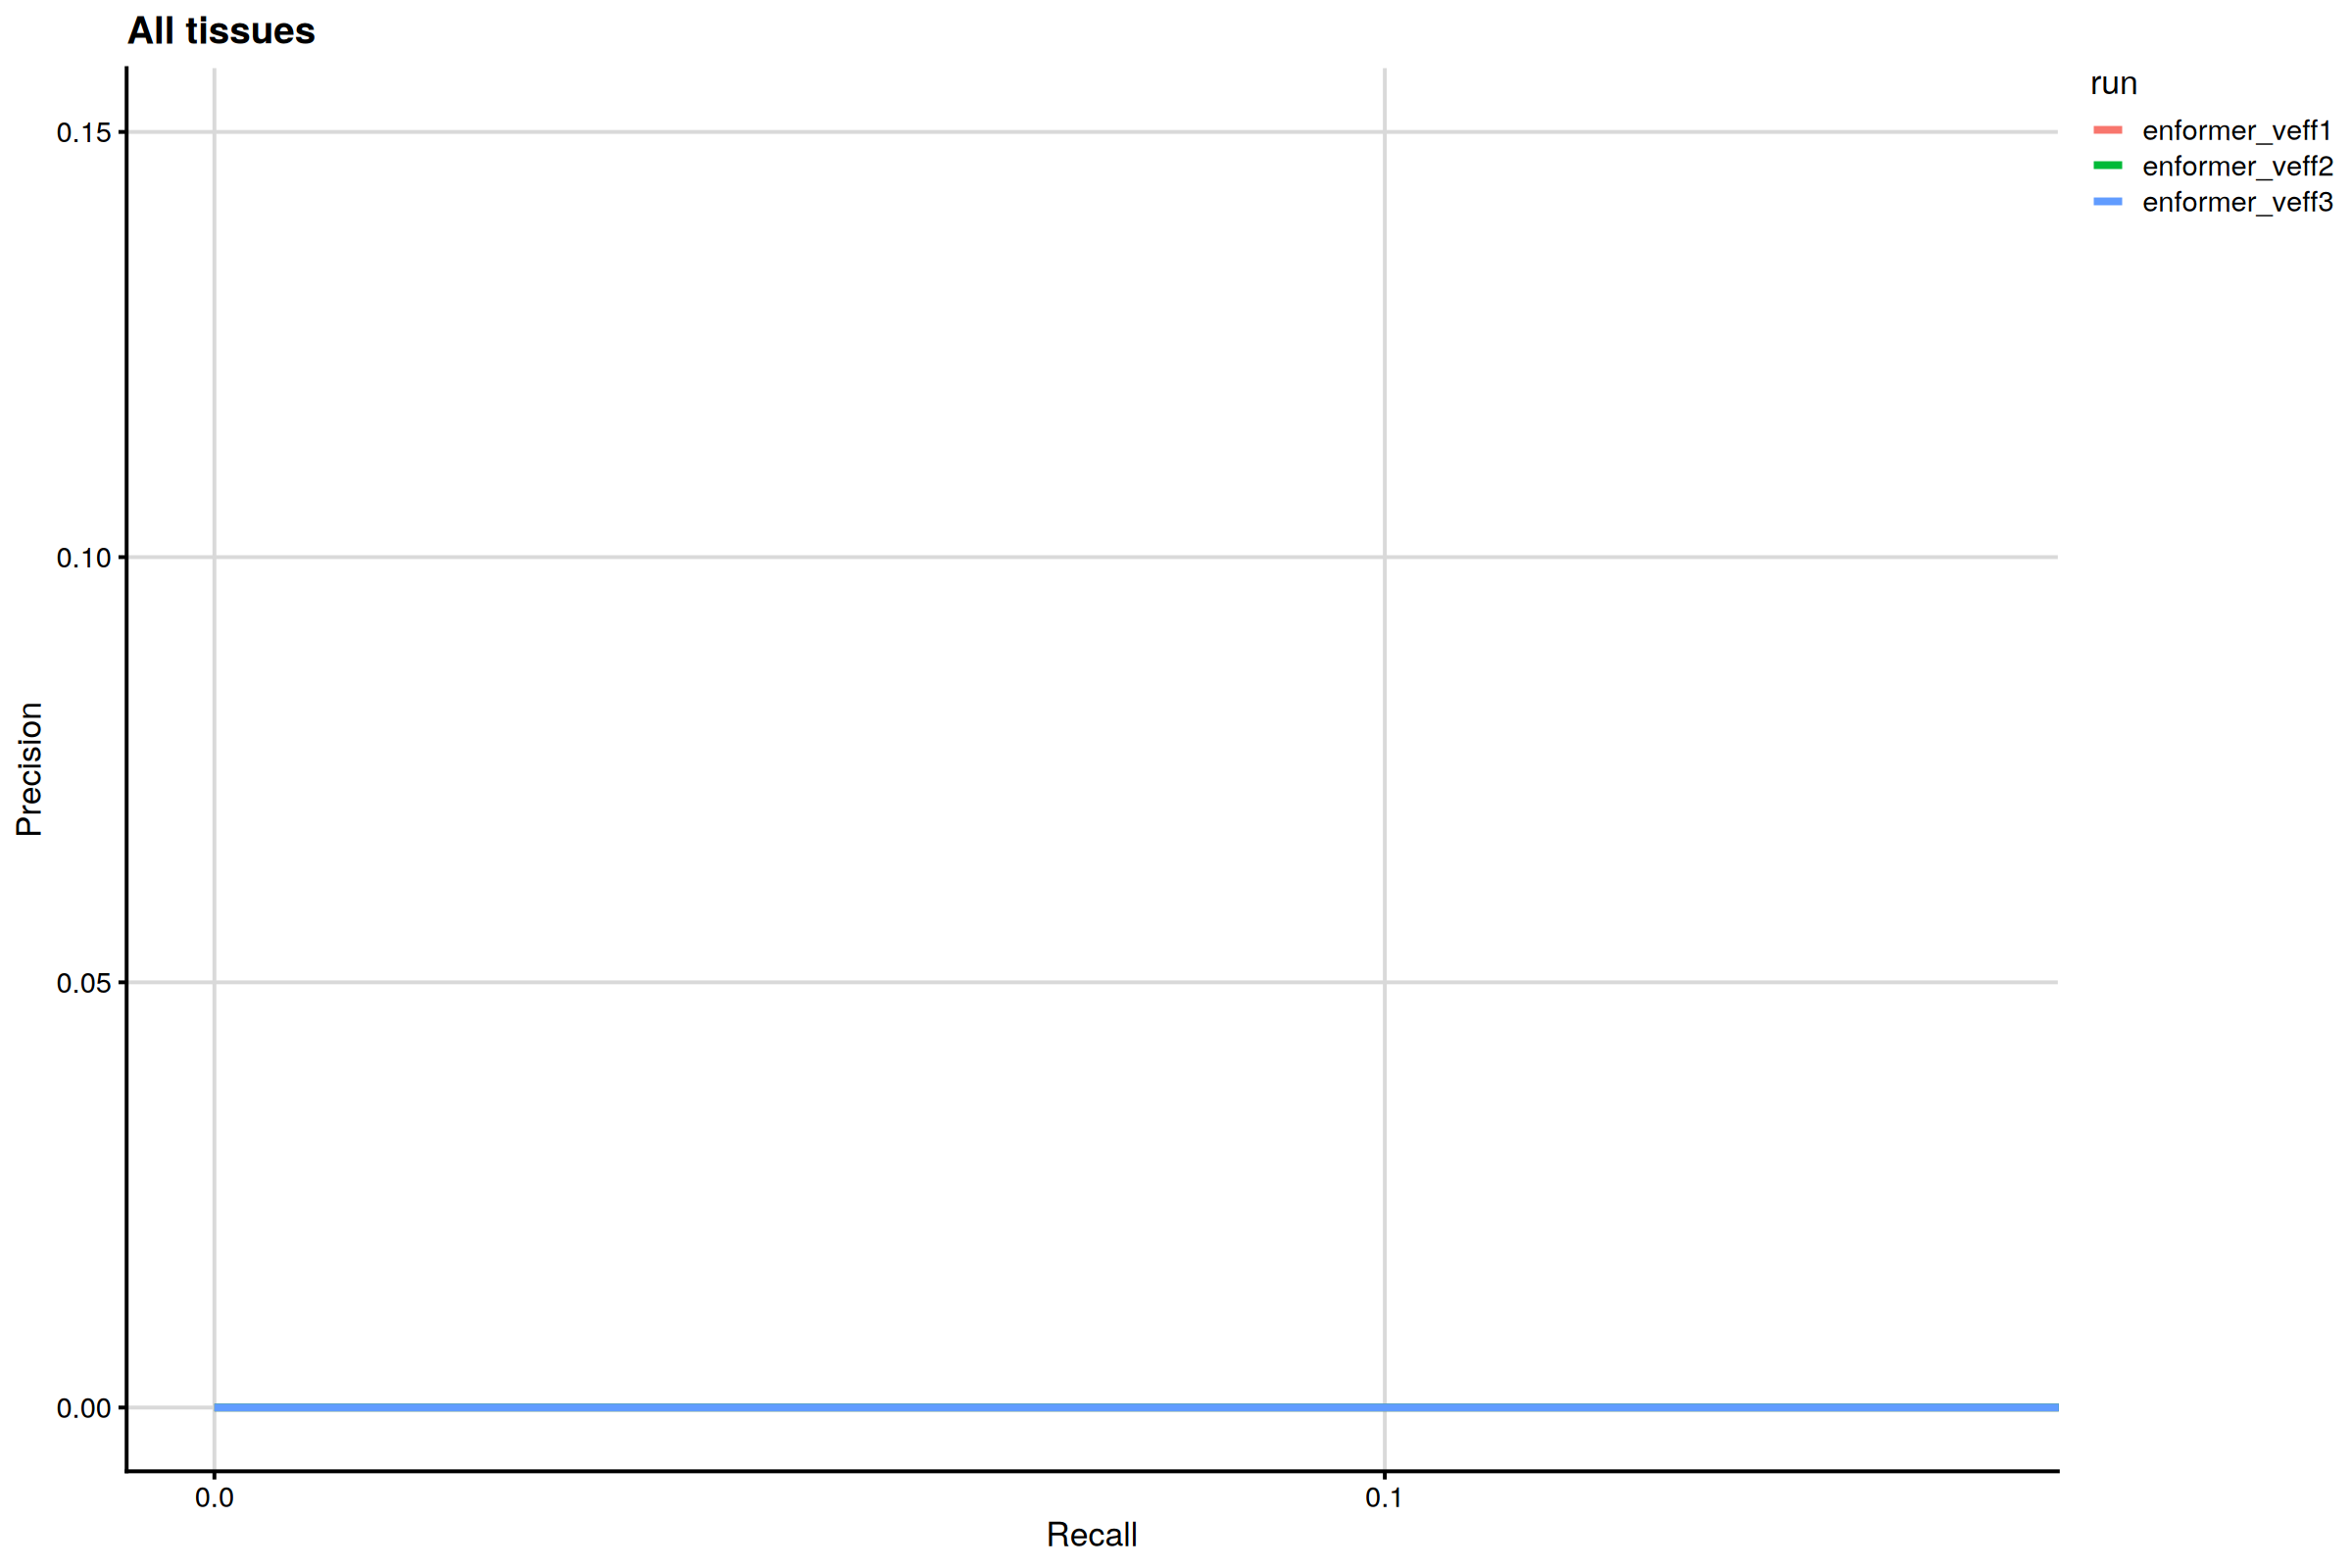

In [9]:
fname = 'prc.parquet'
t = 'total'
title='All tissues'
prc_plot(copy(eval_list[[fname]]) %>% .[type_ == t], title=title)

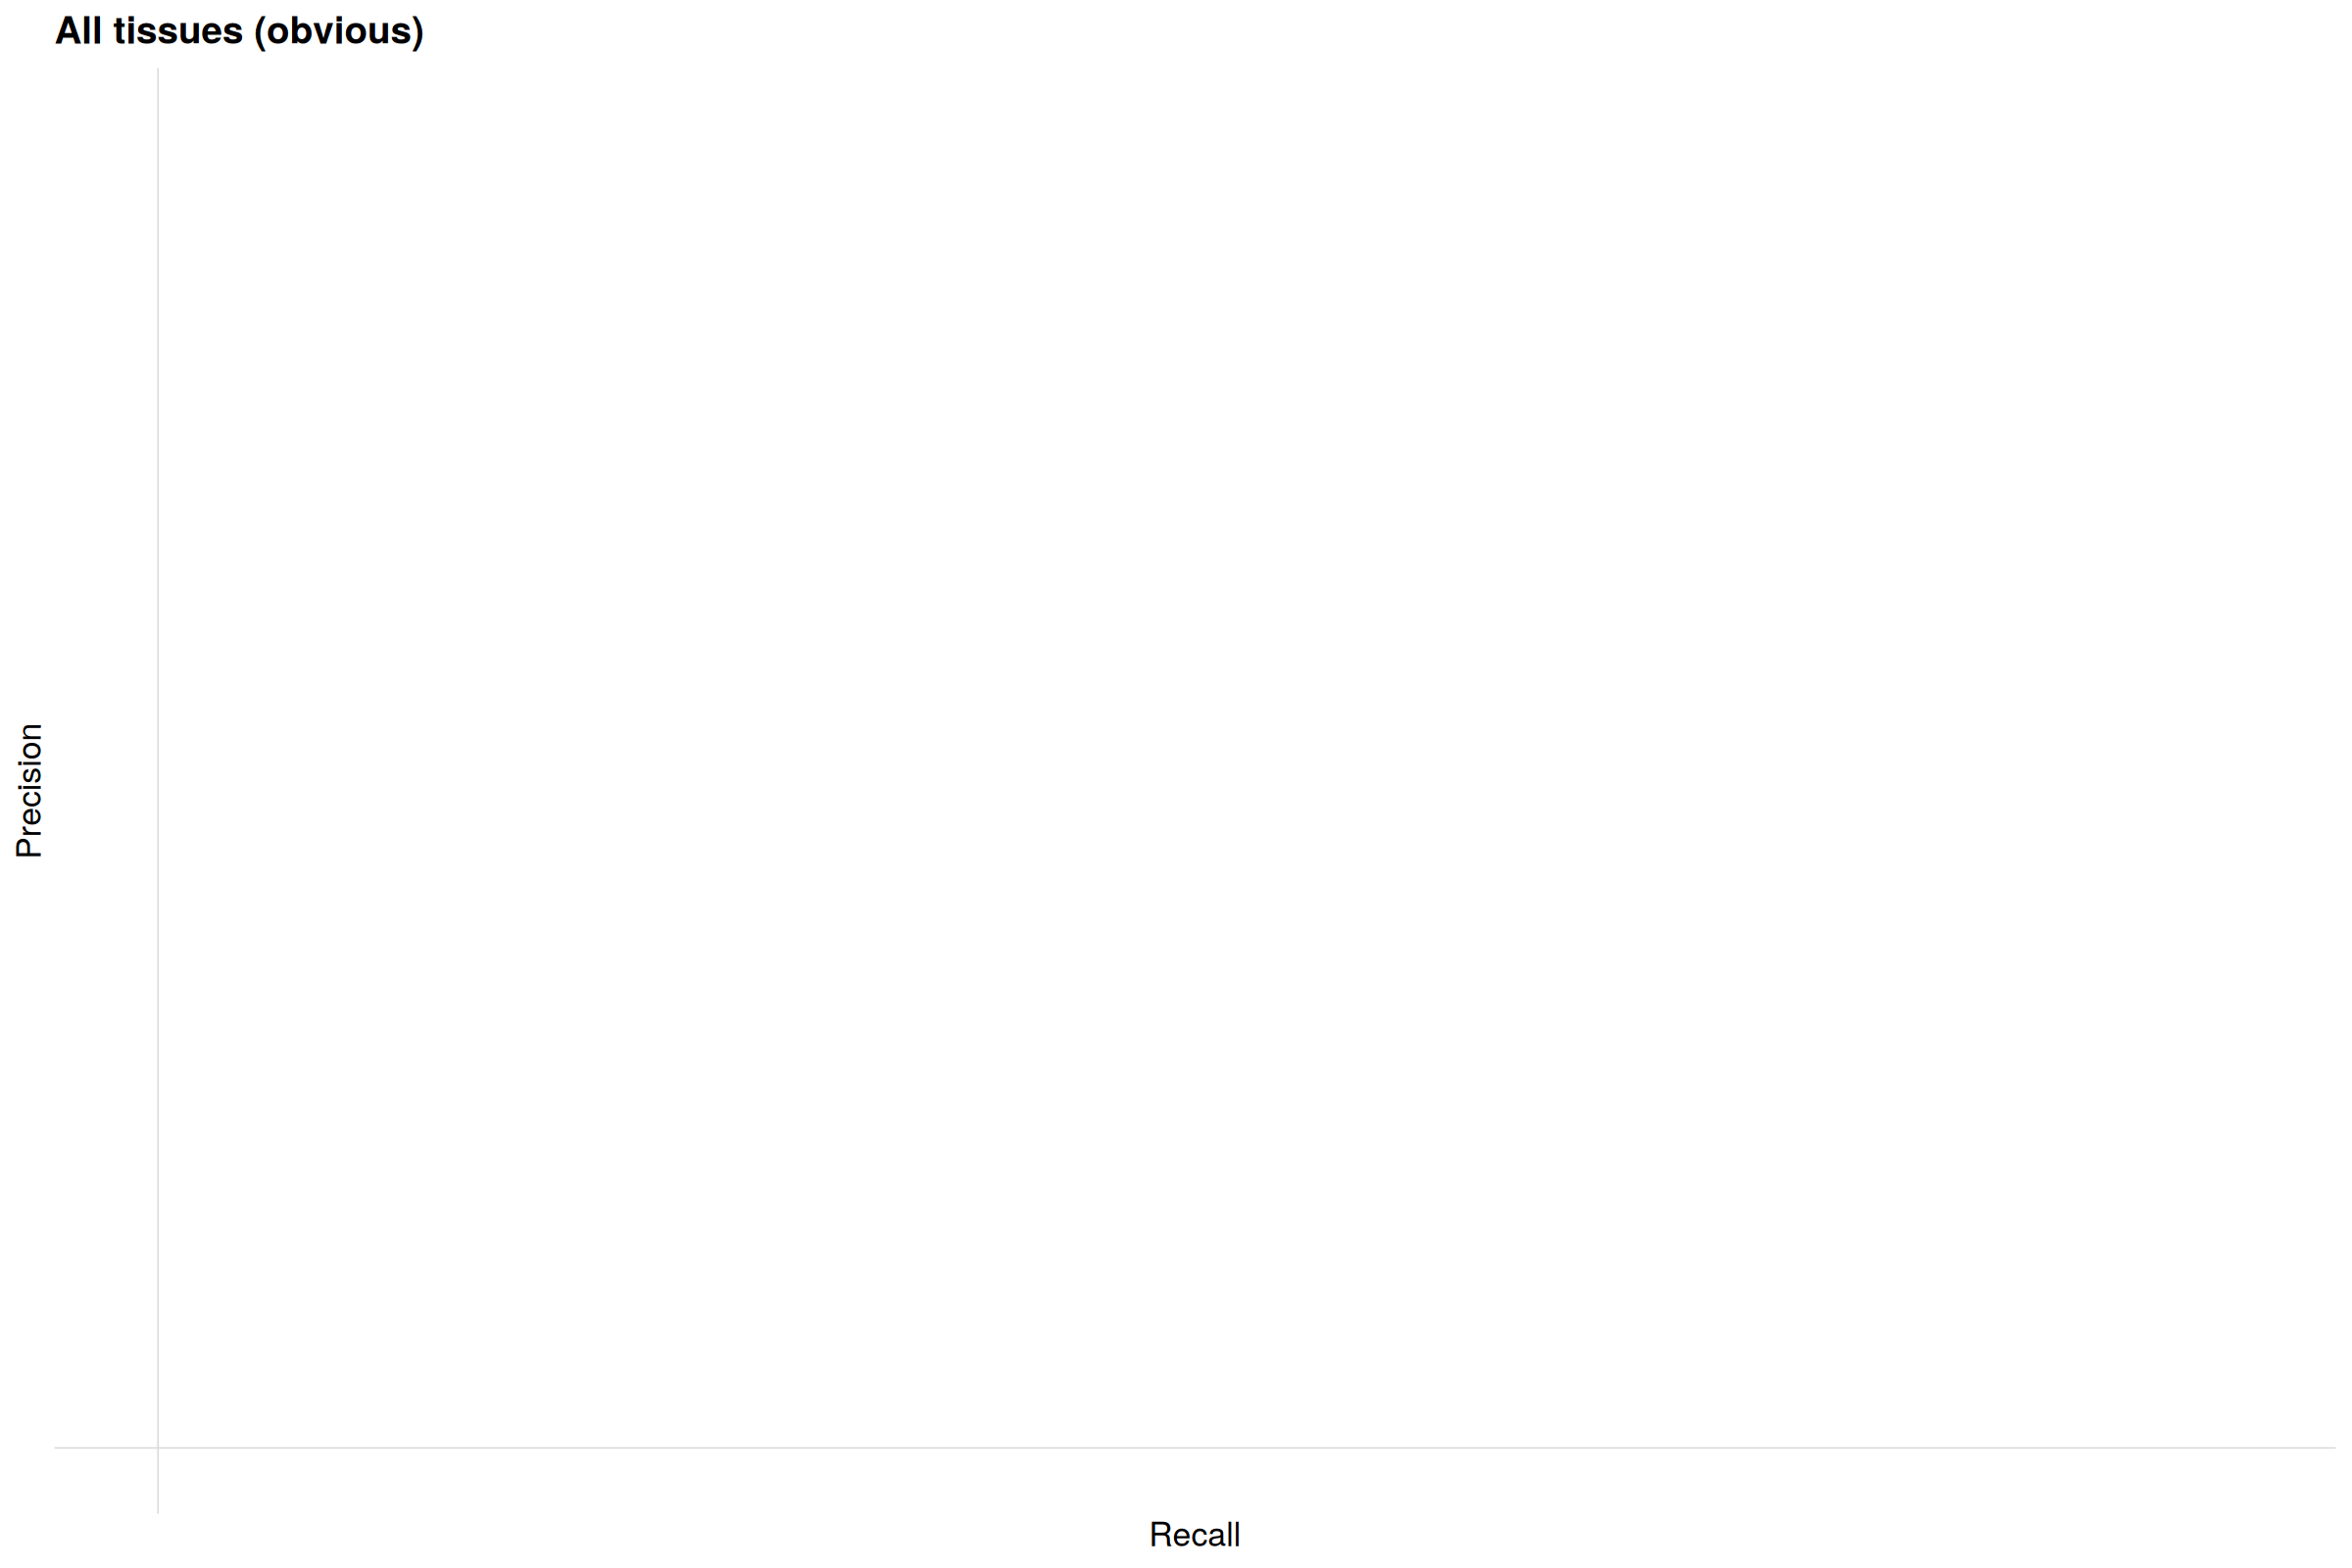

In [10]:
fname = 'prc.parquet'
t = 'obvious'
title='All tissues (obvious)'
prc_plot(copy(eval_list[[fname]]) %>% .[type_ == t], title=title)

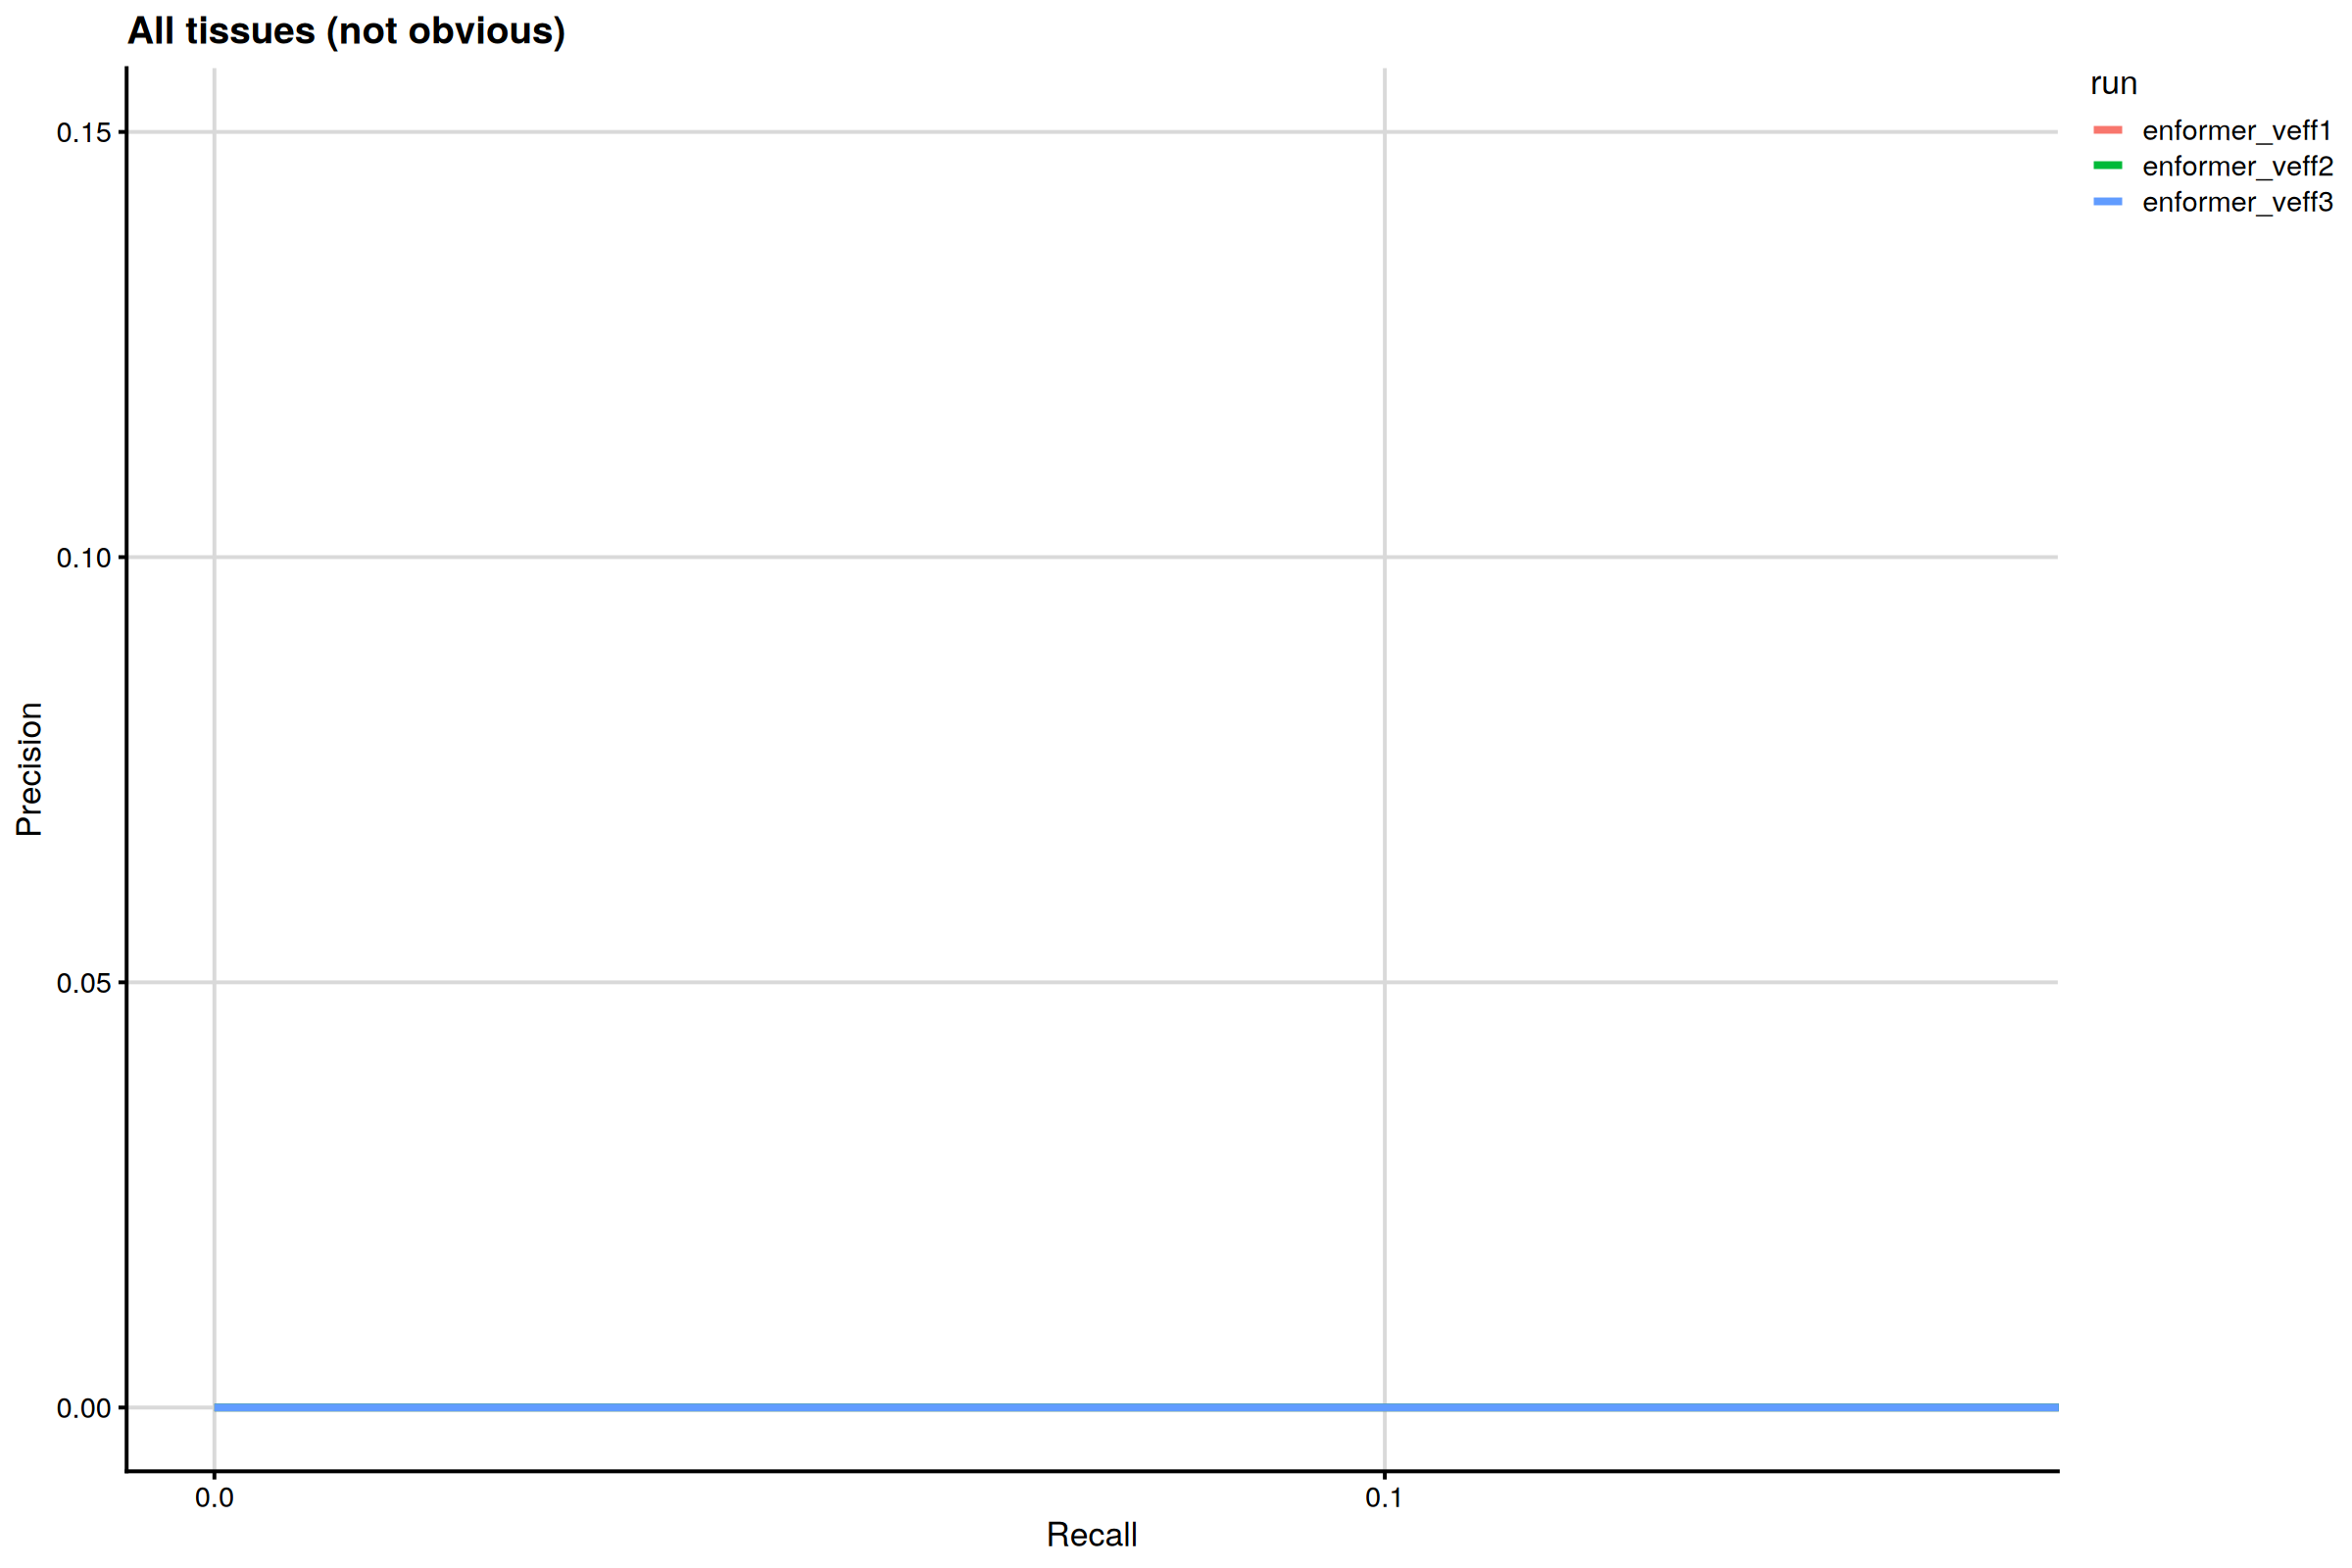

In [11]:
fname = 'prc.parquet'
t = 'not_obvious'
title='All tissues (not obvious)'
prc_plot(copy(eval_list[[fname]]) %>% .[type_ == t], title=title)

In [12]:
new_levels = df$run %>% unique
df[, run := factor(run, levels=new_levels)]

In [38]:
boxplot_plot = function(df, title, metric_name, ylim=NULL, is_y_percent=FALSE, pval_y_start=NULL, pval_y_end=NULL){
    df = copy(df)
    # find best run
    df[, median_score := median(score), by='run']
    df = df[order(-median_score)]
    # change order of run levels
    new_levels = df$run %>% unique %>% rev
    df[, run := factor(run, levels=new_levels)]
    best_run = df[1, run]

    # Wilcoxon test between best run and everything else
    comparisons = lapply(setdiff(RUN_KEYS, best_run), function(x) c(as.character(best_run), as.character(x)))

    stat.test <- (
        df
        %>% wilcox_test(`score` ~ `run`, paired=TRUE, comparisons=comparisons) 
        %>% add_significance("p")
    )
    

    # Add p-values to a boxplot
    stat.test <- stat.test %>% add_xy_position(x = "run") %>% arrange(xmin)
    stat.test$p_label = paste0(ifelse(stat.test$statistic == 0, "P < ", "P = "), lapply(stat.test$p, function(x) fancy_scientific(x, 1)))                     
    # print(as.data.table(stat.test))

    if (!is.null(pval_y_start) & !is.null(pval_y_end)){
        n = nrow(stat.test)
        stat.test$y.position = seq(pval_y_start, pval_y_end, length.out = n)
    }
    # print(as.data.table(stat.test))
                                                                                        
    p <- (
        ggplot(df, aes(y=`score`, x=`run`))
        + coord_flip()
        + geom_boxplot(aes(fill=`run`))
        + scale_y_continuous(
            limits=if (is.null(ylim)) c(0, max(df[['score']]) * 2) else ylim,
            labels=if (is_y_percent) scales::percent else waiver()
        )
        + THEME
        + background_grid(major = "y")
        + theme(legend.title = element_blank())
        + theme(legend.position = "none")
        + labs(
            y=metric_name,
            x=element_blank(),
            title=title
        )
        + stat_pvalue_manual(stat.test, label = "{p.signif}", coord.flip=TRUE)
    )
                                                                                    
                                                                                        
    return(p)
}                                                                                        

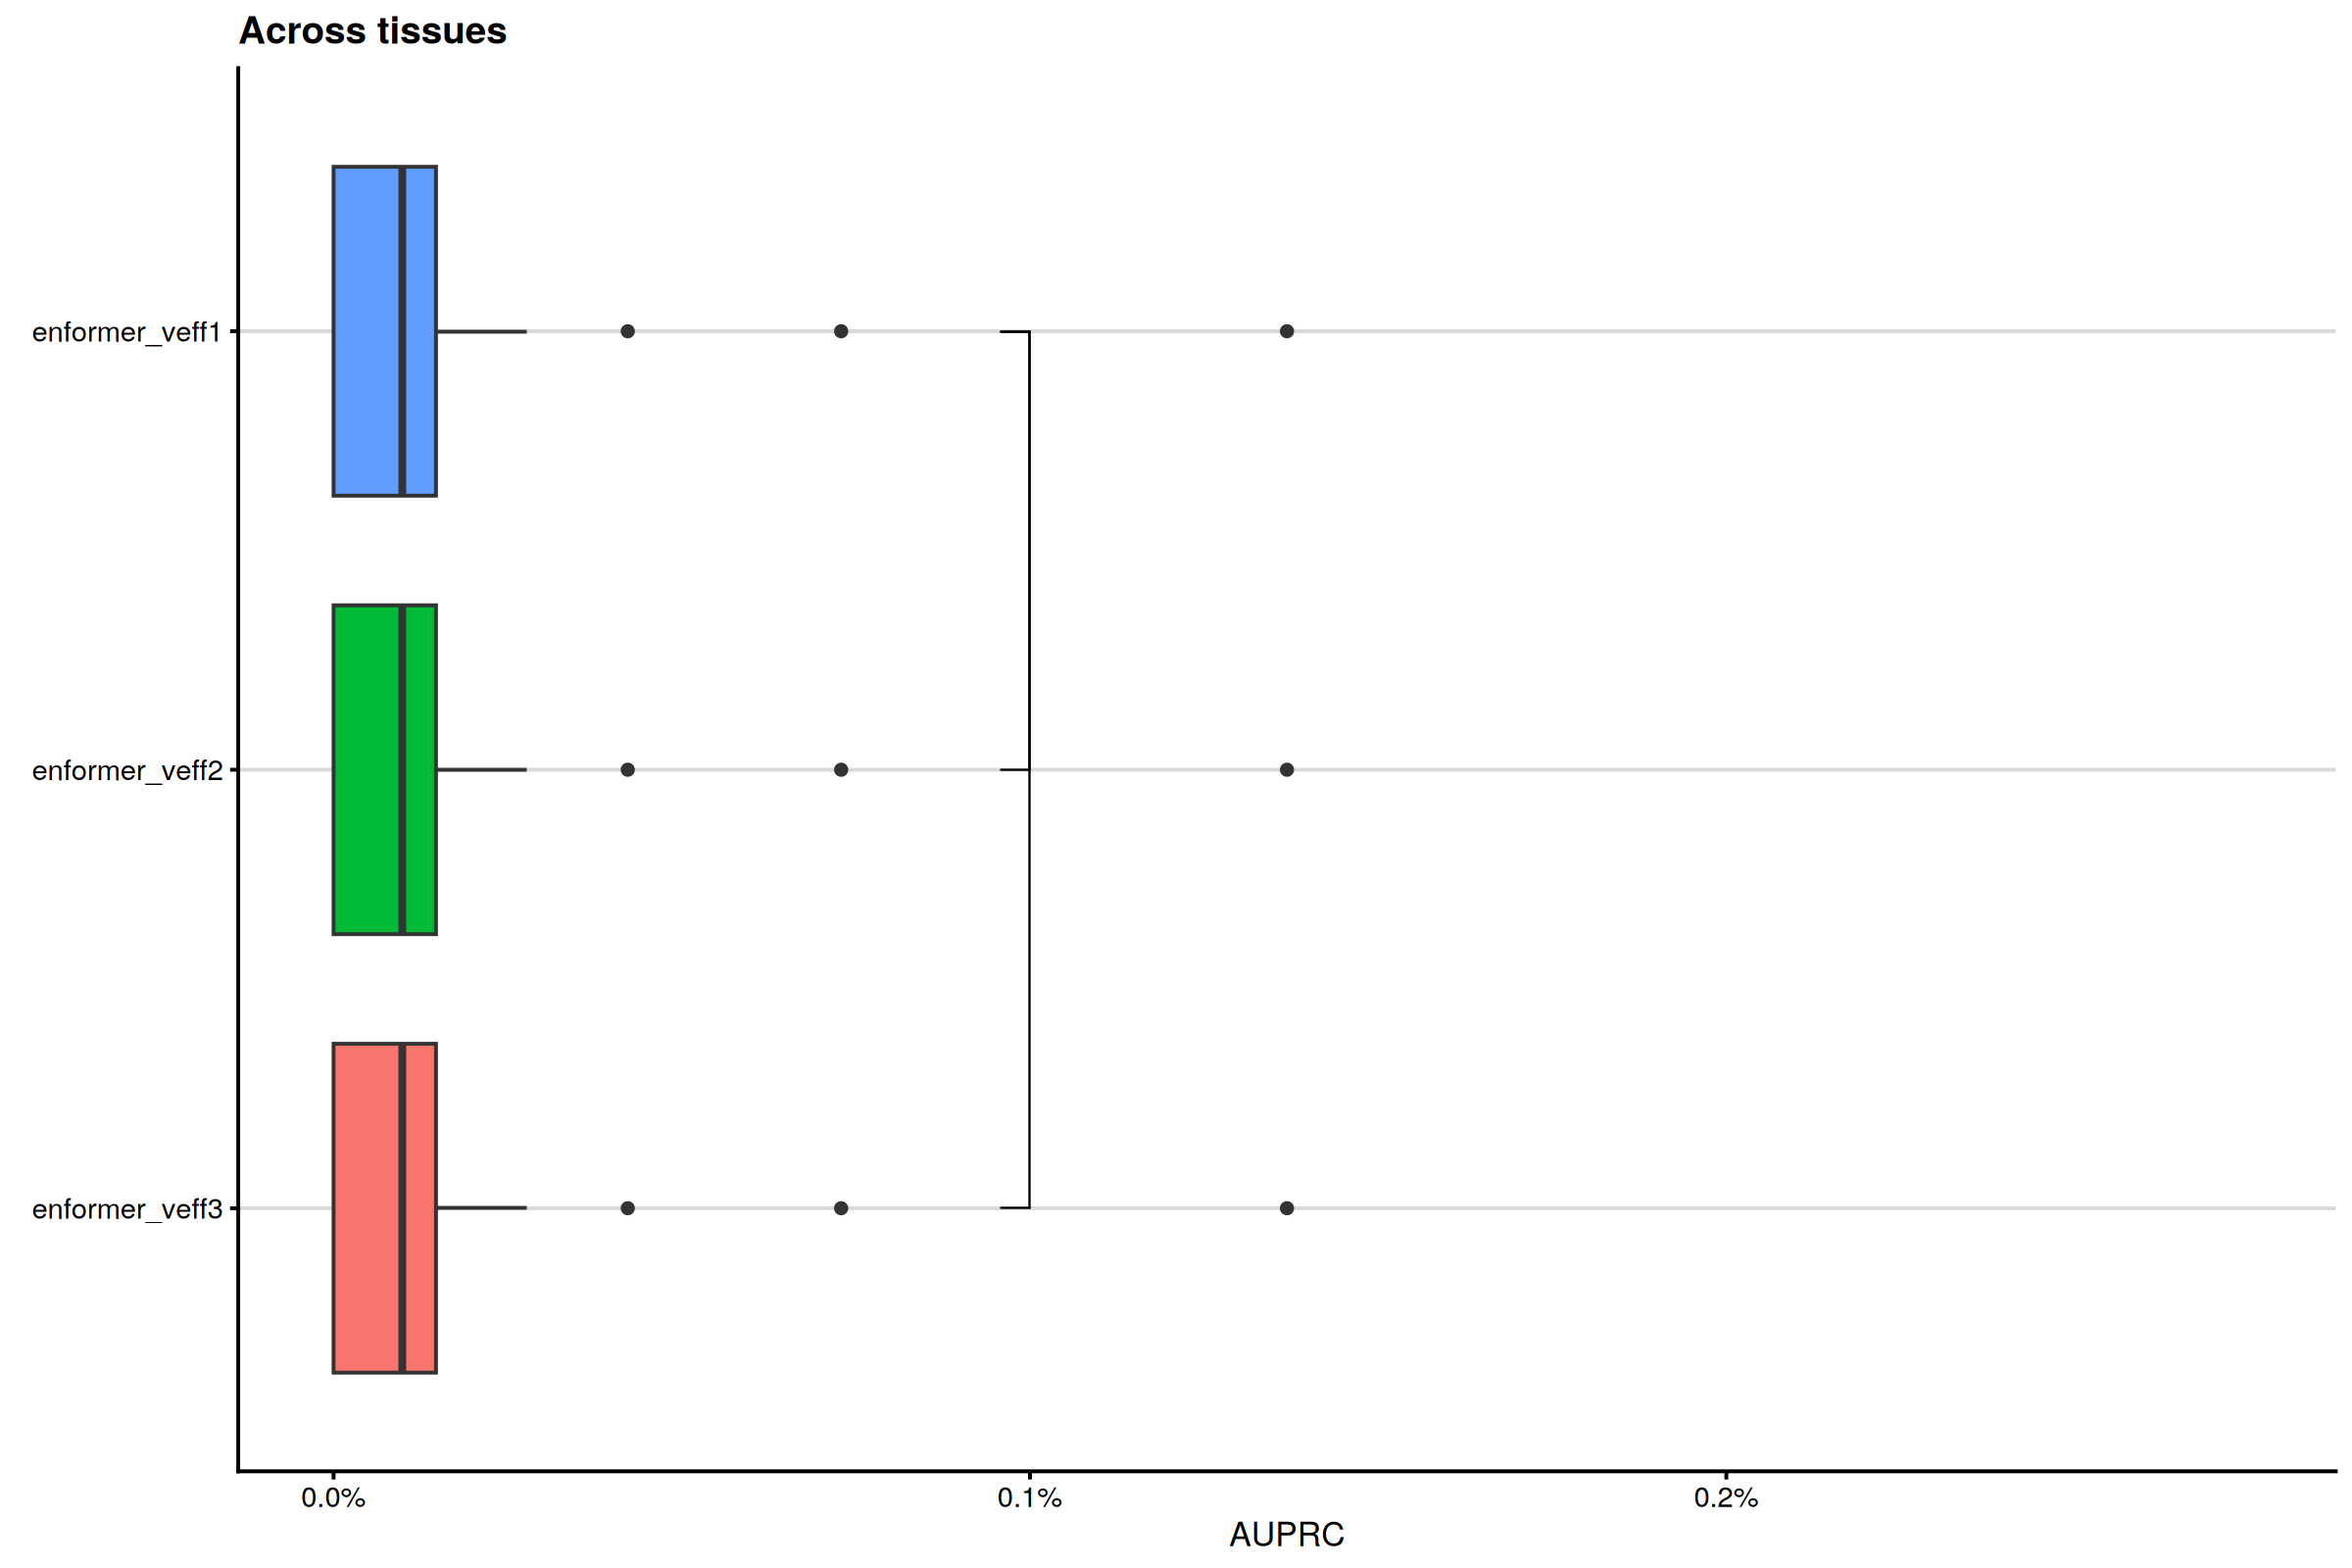

In [43]:
feature = 'tissue'
fname = paste0('prc_', feature, '.parquet')
t = 'total'
metric='auc'
title='Across tissues'
metric_name = 'AUPRC'
df = (copy(eval_list[[fname]]) %>% 
      .[type_ == t, .(feature=get(feature), run, score=get(metric))] %>% 
      unique)
boxplot_plot(df, title, metric_name, is_y_percent=TRUE)

Warning message:
“Removed 90 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range (`geom_bracket()`).”


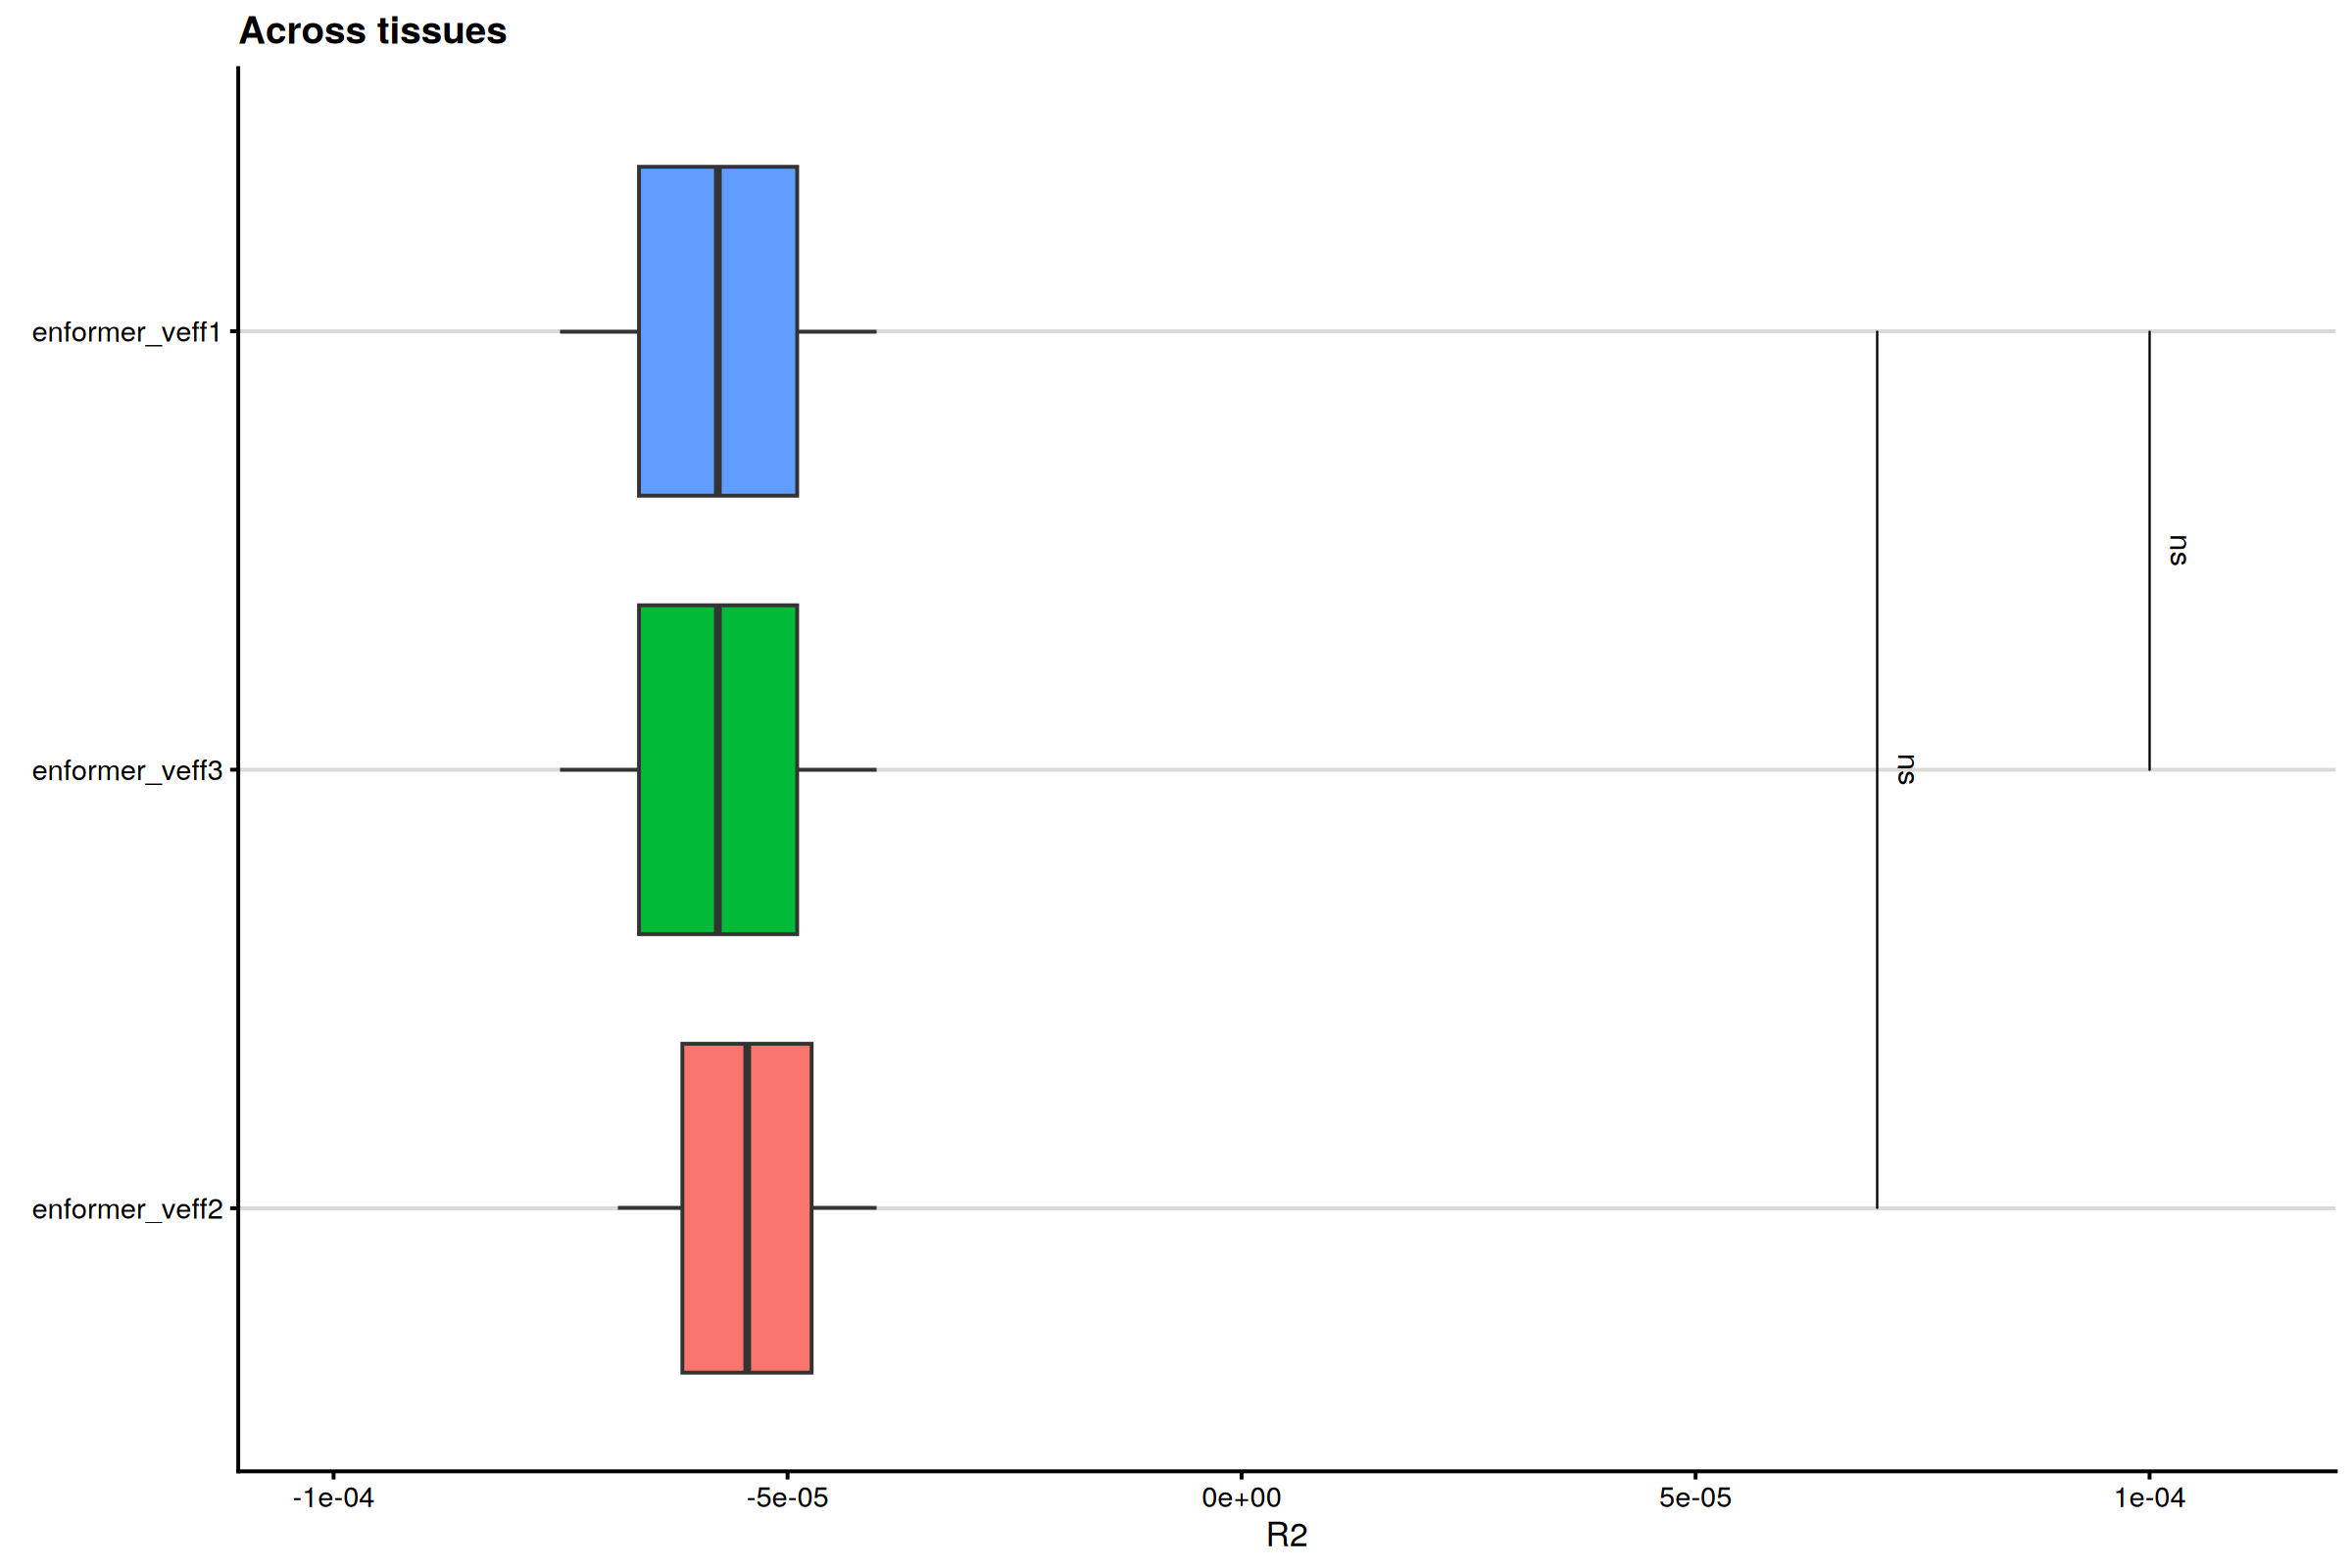

In [44]:
feature = 'tissue'
fname = paste0('r2_', feature, '.parquet')
t = 'total'
metric='r2'
title='Across tissues'
metric_name = 'R2'
df = (copy(eval_list[[fname]]) %>% 
      .[type_ == t, .(feature=get(feature), run, score=get(metric))] %>% 
      unique)
boxplot_plot(df, title, metric_name, ylim=c(-10e-05, 11e-05), pval_y_start=7e-05, pval_y_end=10e-05)

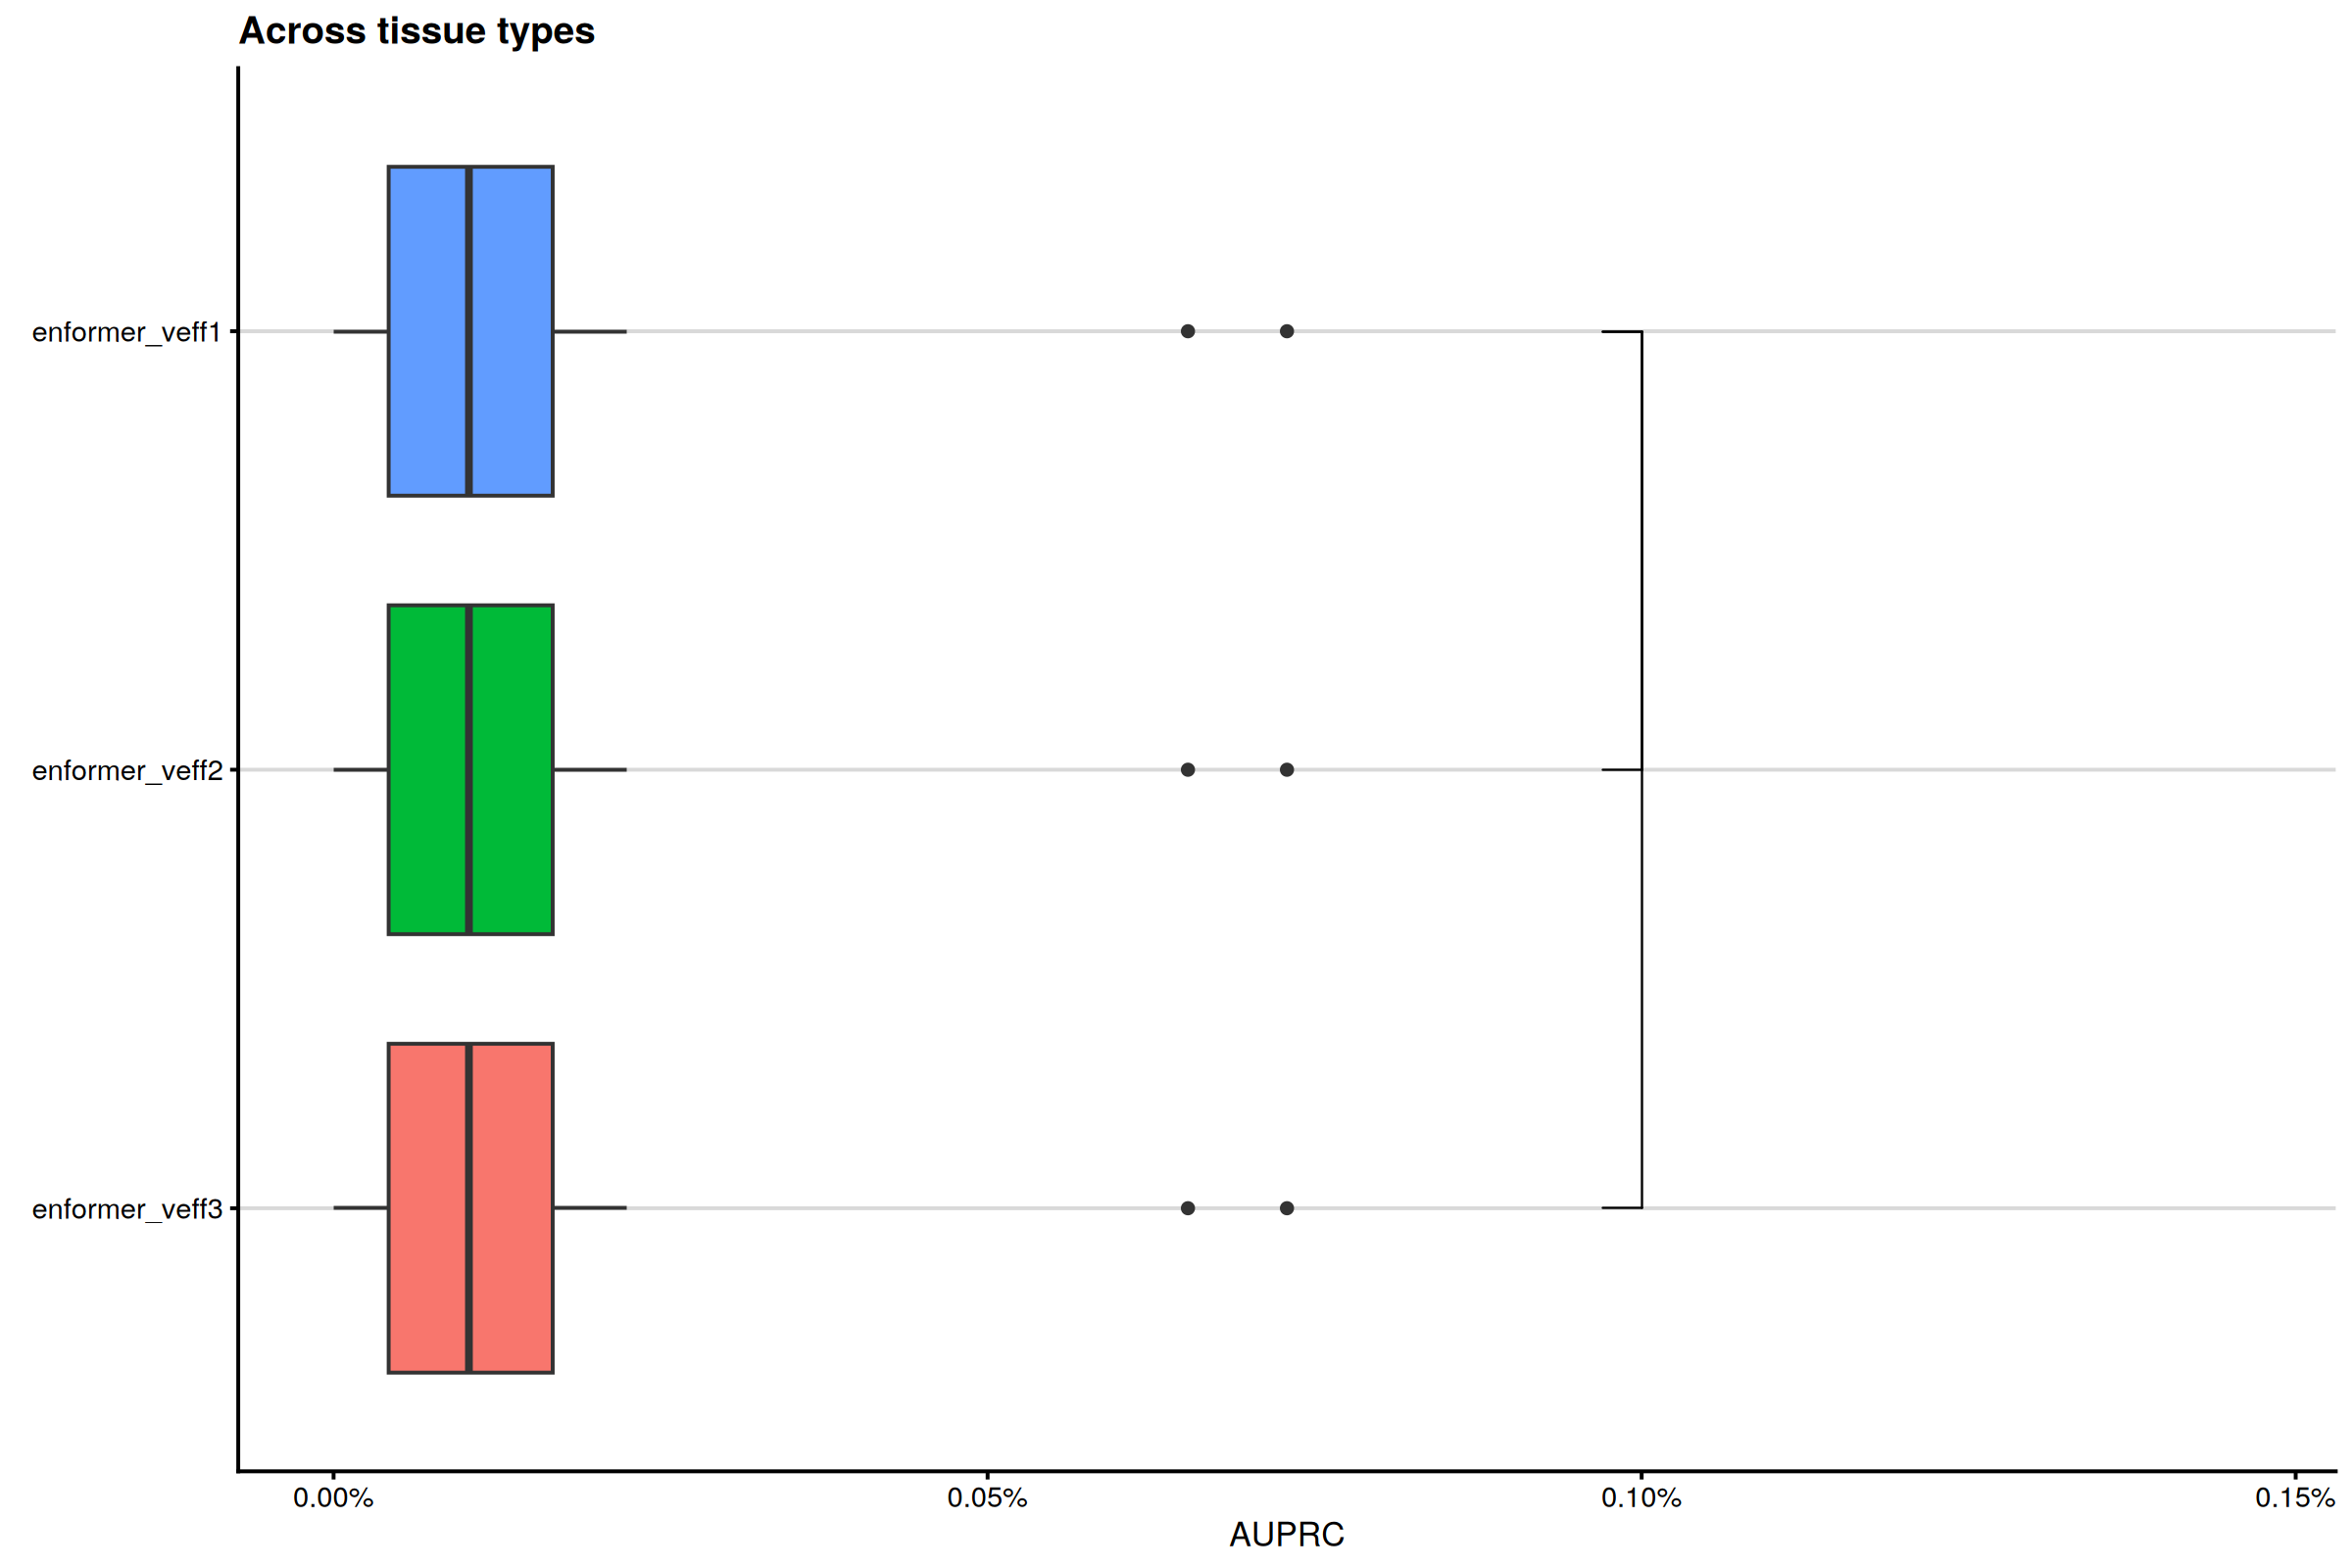

In [45]:
feature = 'tissue_type'
fname = paste0('prc_', feature, '.parquet')
t = 'total'
metric='auc'
title='Across tissue types'
metric_name = 'AUPRC'
df = (copy(eval_list[[fname]]) %>% 
      .[type_ == t, .(feature=get(feature), run, score=get(metric))] %>% 
      unique)
boxplot_plot(df, title, metric_name, is_y_percent=TRUE)

Warning message:
“Removed 60 rows containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range (`geom_bracket()`).”


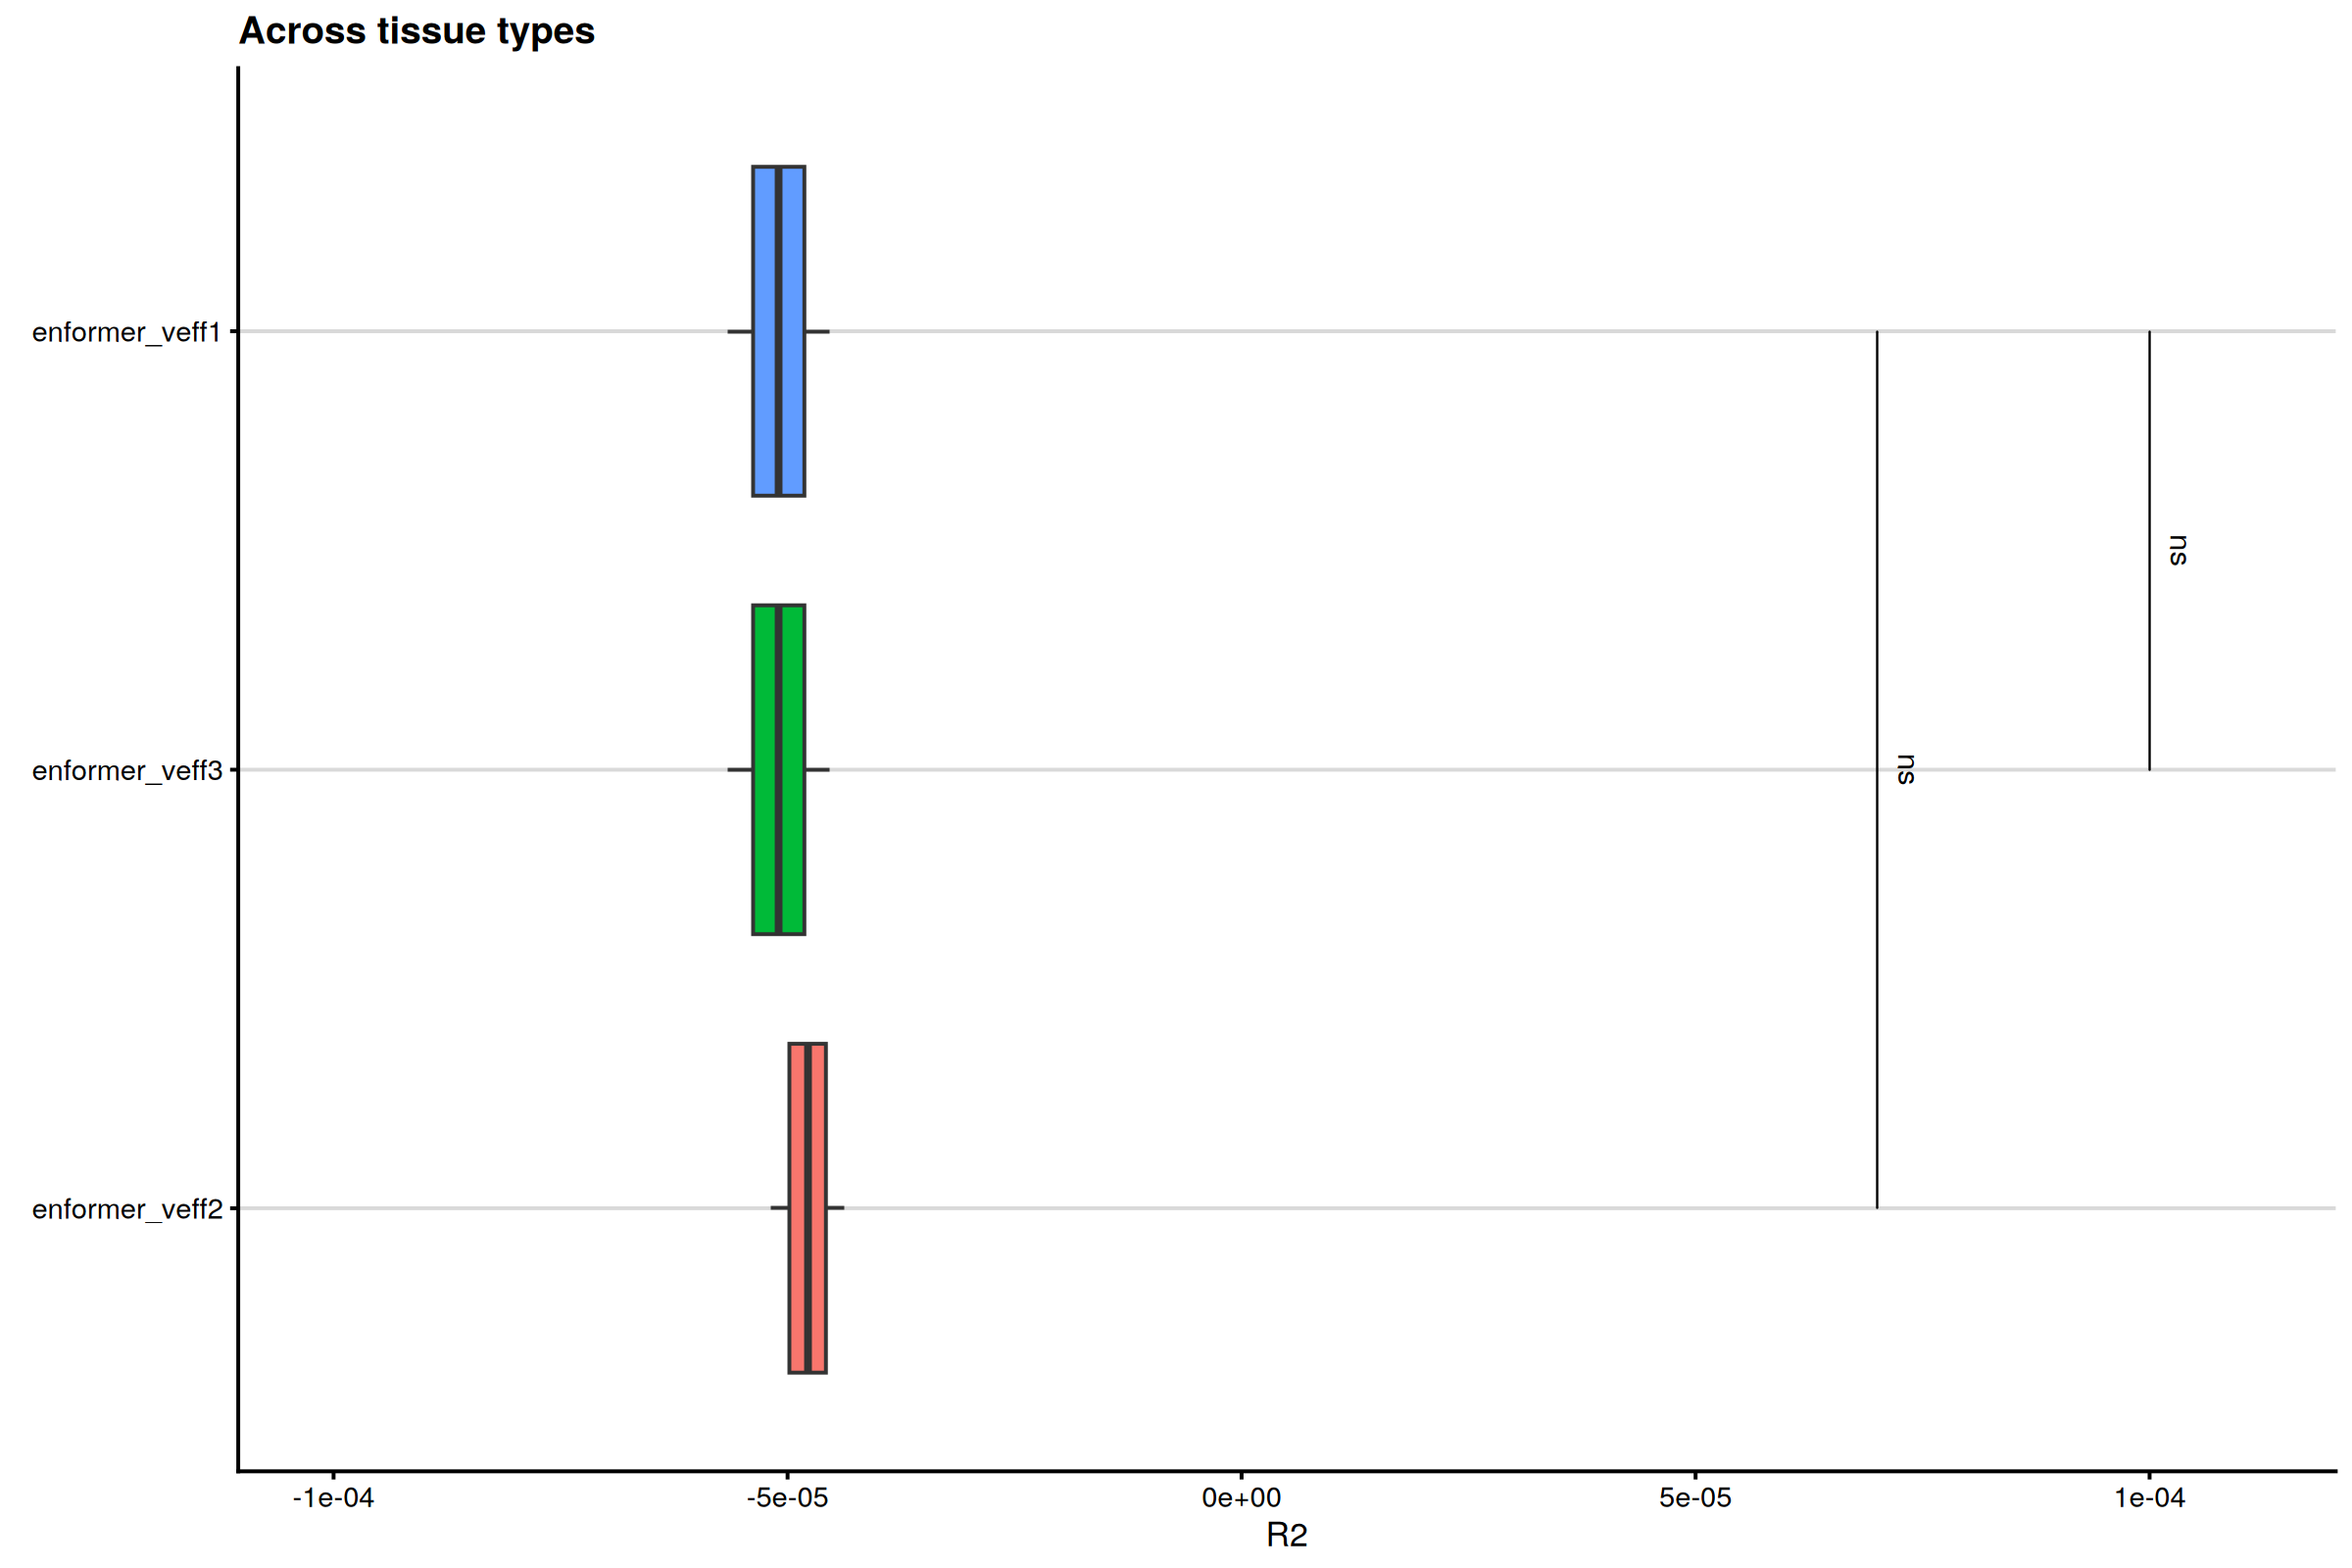

In [46]:
feature = 'tissue_type'
fname = paste0('r2_', feature, '.parquet')
t = 'total'
metric='r2'
title='Across tissue types'
metric_name = 'R2'
df = (copy(eval_list[[fname]]) %>% 
      .[type_ == t, .(feature=get(feature), run, score=get(metric))] %>% 
      unique)
boxplot_plot(df, title, metric_name, ylim=c(-10e-05, 11e-05), pval_y_start=7e-05, pval_y_end=10e-05)

Warning message:
“Removed 4 rows containing missing values or values outside the scale range (`geom_bracket()`).”


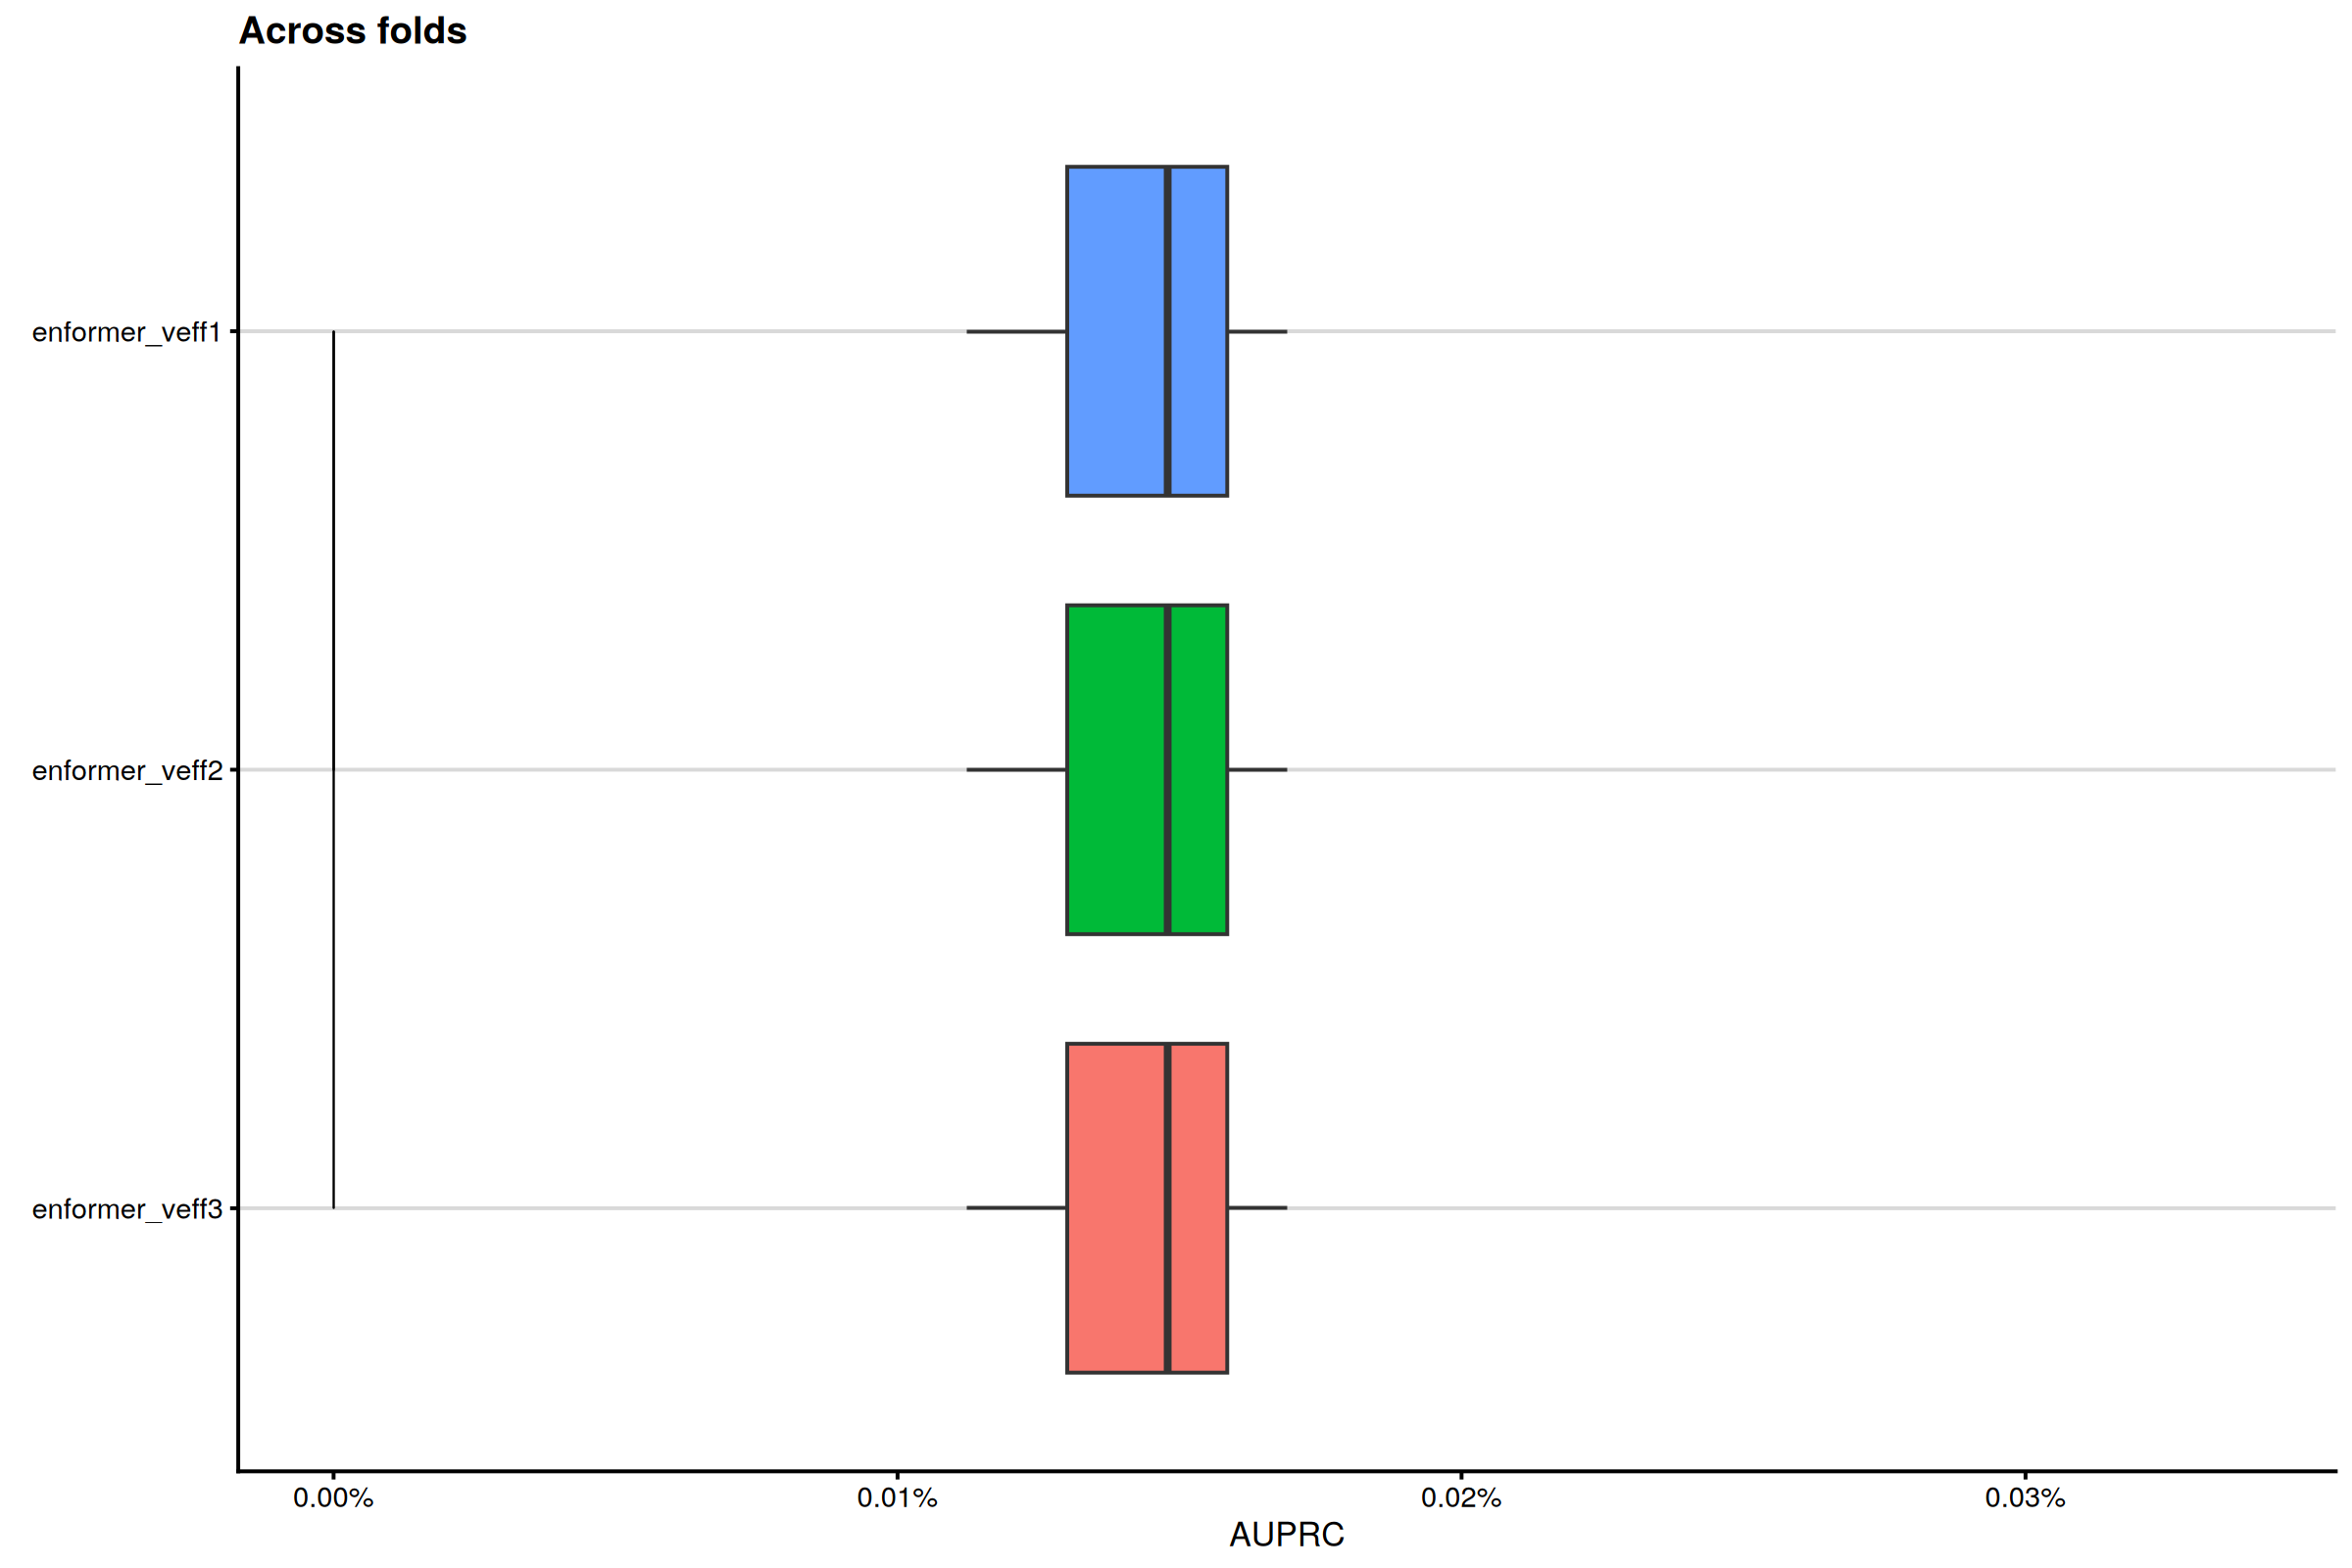

In [47]:
feature = 'fold'
fname = paste0('prc_', feature, '.parquet')
t = 'total'
metric='auc'
title='Across folds'
metric_name = 'AUPRC'
df = (copy(eval_list[[fname]]) %>% 
      .[type_ == t, .(feature=get(feature), run, score=get(metric))] %>% 
      unique)
boxplot_plot(df, title, metric_name, is_y_percent=TRUE)

Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_boxplot()`).”


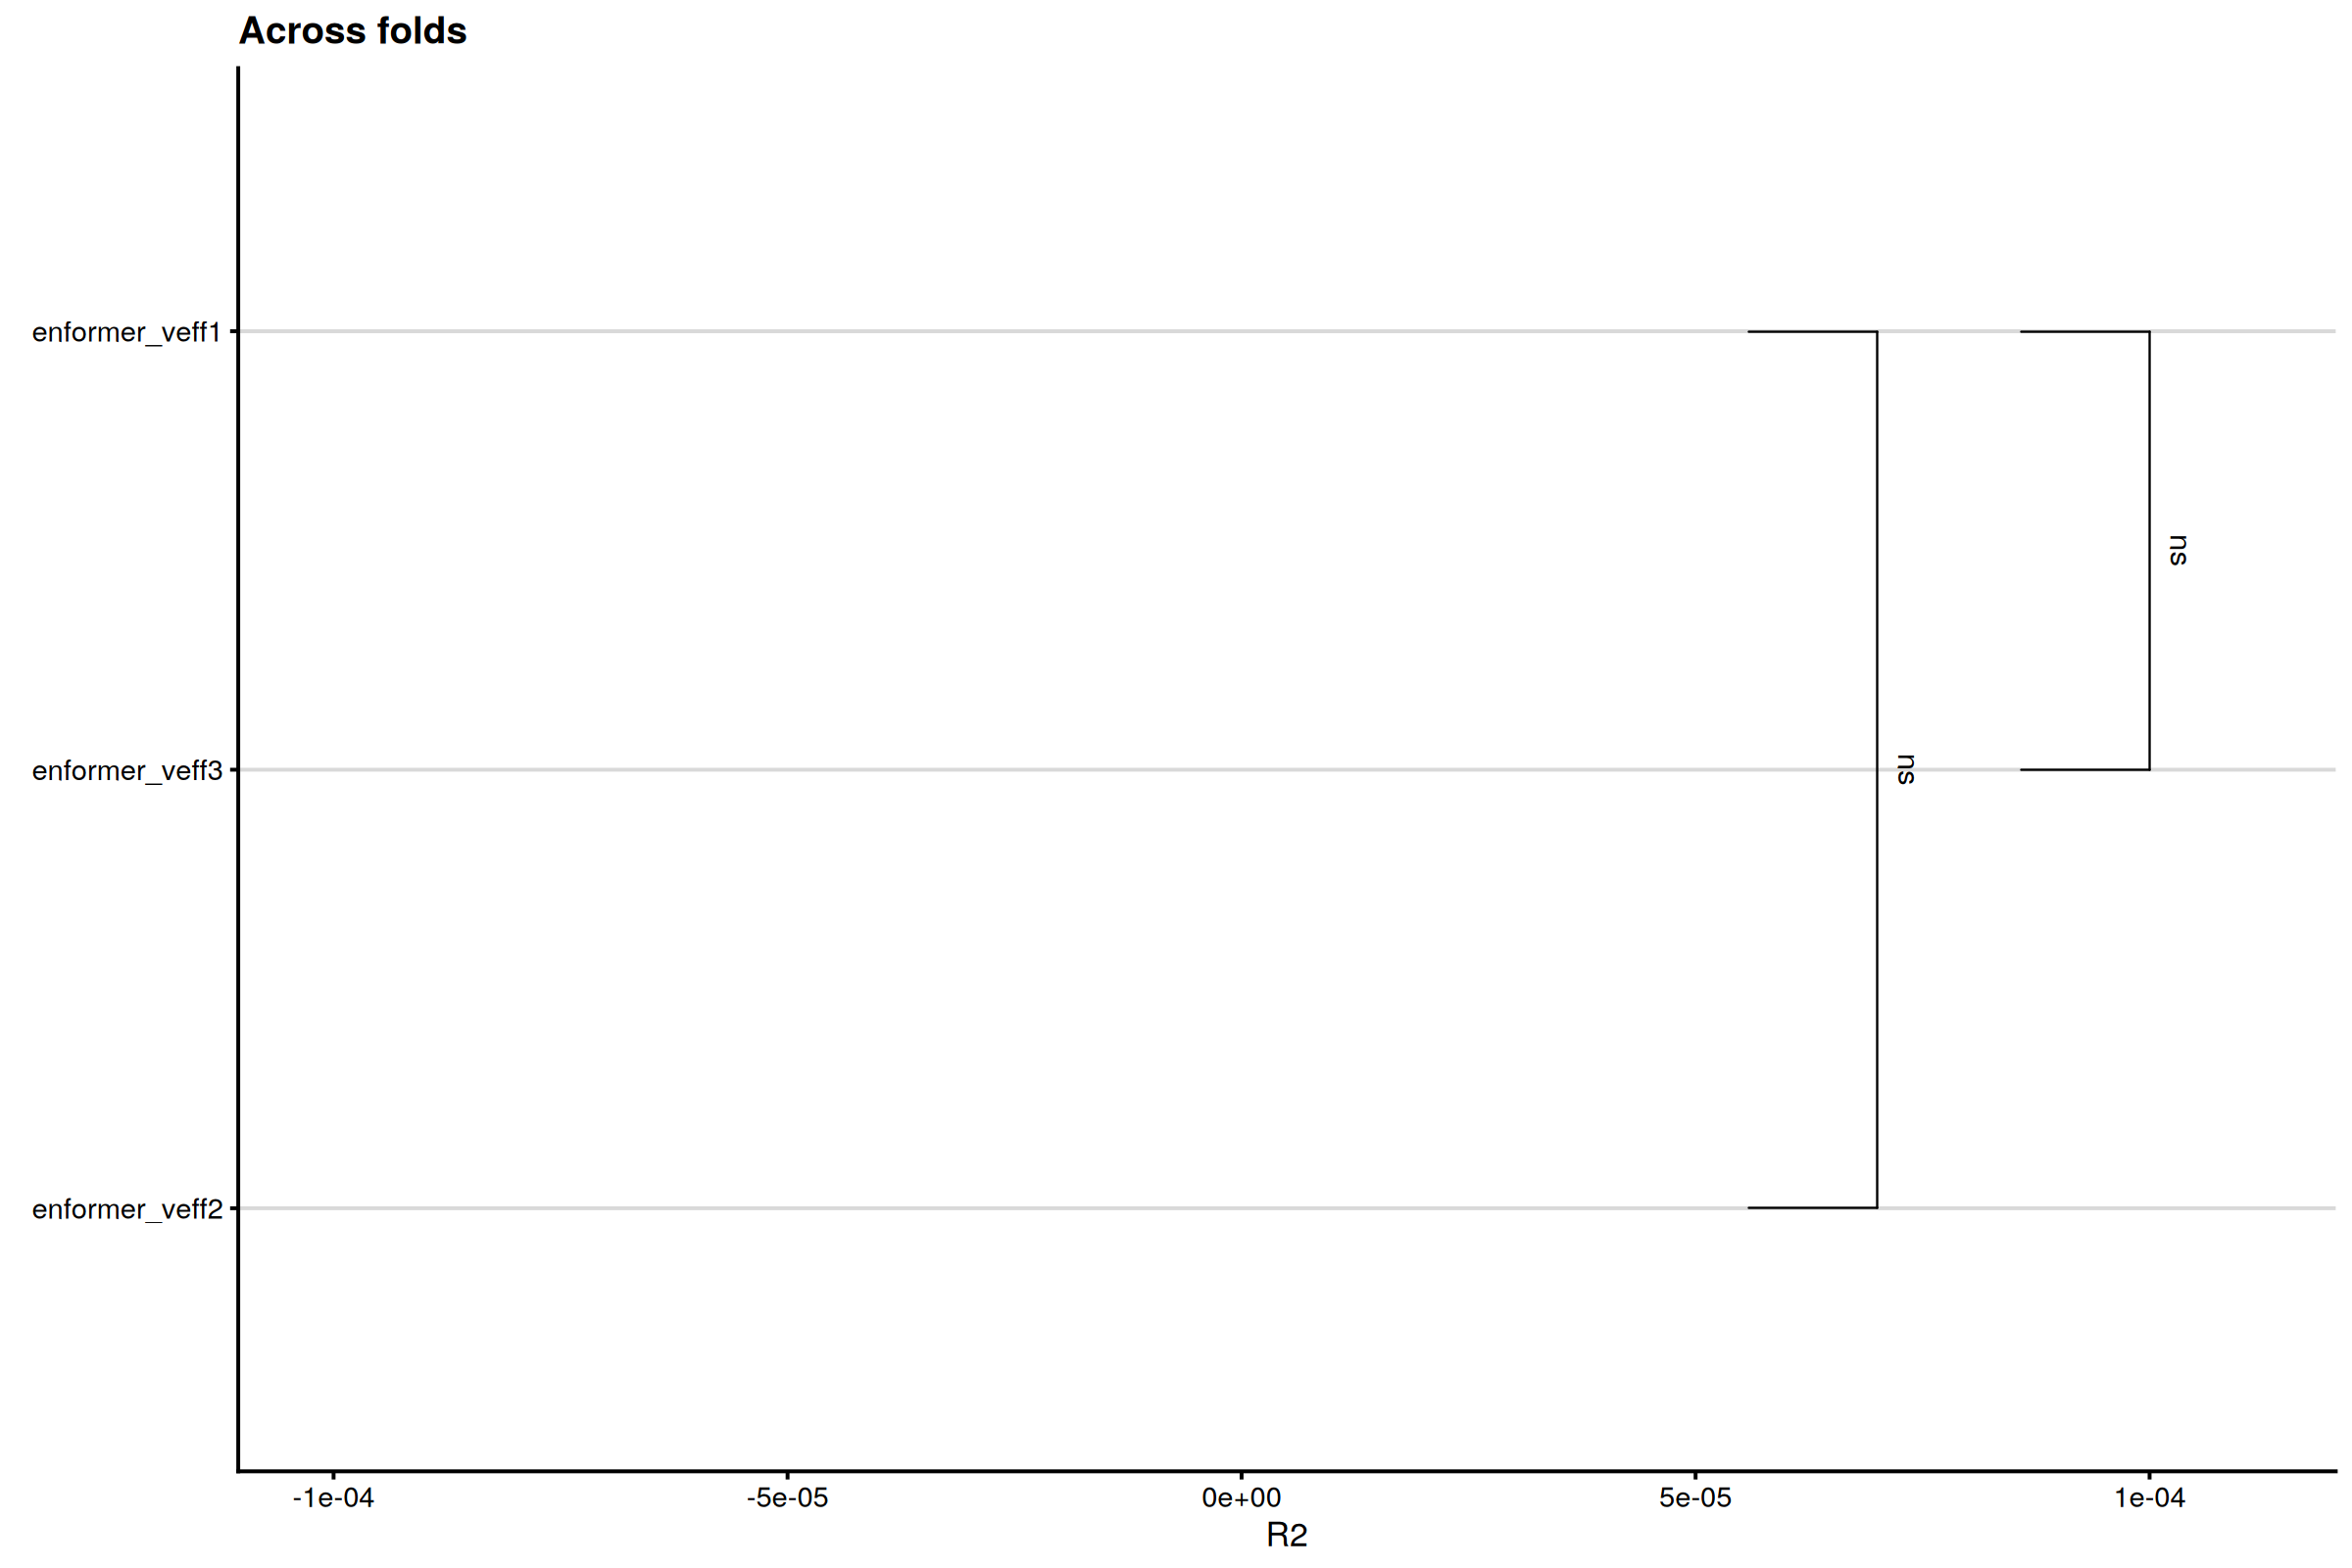

In [50]:
feature = 'fold'
fname = paste0('r2_', feature, '.parquet')
t = 'total'
metric='r2'
title='Across folds'
metric_name = 'R2'
df = (copy(eval_list[[fname]]) %>% 
      .[type_ == t, .(feature=get(feature), run, score=get(metric))] %>% 
      unique)
boxplot_plot(df, title, metric_name, ylim=c(-10e-05, 11e-05), pval_y_start=7e-05, pval_y_end=10e-05)